In [298]:
import os
import anndata as ad
import umap
import scipy as sip
from scipy import sparse
from sklearn import preprocessing
import scanpy as scp
import pickle
import pandas as pd
import numpy as np
import igraph as ig
import seaborn as sb
import snf
import sklearn as skl
from sklearn import cluster
from sklearn.metrics import adjusted_mutual_info_score as ami
from snf import compute, metrics
import matplotlib.pyplot as plt
from collections import Counter
import math
import itertools
from sklearn.metrics import v_measure_score
from sklearn.cluster import spectral_clustering
import matplotlib.patches as mpatches

In [299]:
data = os.path.abspath(os.path.join(os.getcwd(),"../data"))

input = os.path.join(data, "input")
output = os.path.join(data, "output")

complementary = os.path.join(input, "complementary")

shared = os.path.join(output, "shared_info_74")


level1 = os.path.join(output, "level1")
level2 = os.path.join(output, "level2")
level3 = os.path.join(output, "level3")


miss_snf = os.path.abspath(os.path.join(os.getcwd(),"../../miss_snf/data/out"))
complementary = os.path.join(input, "complementary")

In [300]:
with open(os.path.join(level1, "graphs_74.pickle"), "rb") as f:
    level1_graphs = pickle.load(f) 
with open(os.path.join(level2, "graphs_74.pickle"), "rb") as f:
    level2_graphs = pickle.load(f) 
with open(os.path.join(level3, "graphs_74.pickle"), "rb") as f:
    level3_graphs = pickle.load(f) 


with open(os.path.join(level1, "correlations.pickle"), "rb") as f:
    level1_correlations = pickle.load(f) 
with open(os.path.join(level2, "correlations.pickle"), "rb") as f:
    level2_correlations = pickle.load(f) 
with open(os.path.join(level3, "correlations.pickle"), "rb") as f:
    level3_correlations = pickle.load(f) 


with open(os.path.join(level1, "kernel_PSNs.pickle"), "rb") as f:
    level1_kernel_PSNs = pickle.load(f) 
with open(os.path.join(level2, "kernel_PSNs.pickle"), "rb") as f:
    level2_kernel_PSNs = pickle.load(f) 
with open(os.path.join(level3, "kernel_PSNs.pickle"), "rb") as f:
    level3_kernel_PSNs = pickle.load(f) 


with open(os.path.join(level1, "knn_PSNs.pickle"), "rb") as f:
    level1_knn_PSNs = pickle.load(f) 
with open(os.path.join(level2, "knn_PSNs.pickle"), "rb") as f:
    level2_knn_PSNs = pickle.load(f)  
with open(os.path.join(level3, "knn_PSNs.pickle"), "rb") as f:
    level3_knn_PSNs = pickle.load(f)

In [301]:
with open(os.path.join(level1, 'weights_modality_frequency.pickle'), 'rb') as f:
    level1_frequency_weights = pickle.load(f)
with open(os.path.join(level1, 'weights_uniform.pickle'), 'rb') as f:
    level1_uniform_weights = pickle.load(f)
with open(os.path.join(level1, 'weights_optimized.pickle'), 'rb') as f:
    level1_opt_weights = pickle.load(f)

with open(os.path.join(level2, 'weights_modality_frequency.pickle'), 'rb') as f:
    level2_frequency_weights = pickle.load(f)
with open(os.path.join(level2, 'weights_uniform.pickle'), 'rb') as f:
    level2_uniform_weights = pickle.load(f)
with open(os.path.join(level2, 'weights_optimized.pickle'), 'rb') as f:
    level2_opt_weights = pickle.load(f)

with open(os.path.join(level3, 'weights_modality_frequency.pickle'), 'rb') as f:
    level3_frequency_weights = pickle.load(f)
with open(os.path.join(level3, 'weights_uniform.pickle'), 'rb') as f:
    level3_uniform_weights = pickle.load(f)
with open(os.path.join(level3, 'weights_optimized.pickle'), 'rb') as f:
    level3_opt_weights = pickle.load(f)

In [302]:
with open(os.path.join(shared, "ground_truth_d.pickle"), "rb") as f:
    gt_d = pickle.load(f) 
with open(os.path.join(shared, "ground_truth_dg.pickle"), "rb") as f:
    gt_dg = pickle.load(f) 


with open(os.path.join(shared, "id_to_name.pickle"), "rb") as f:
    id_to_name = pickle.load(f) 
with open(os.path.join(shared, "name_to_id.pickle"), "rb") as f:
    name_to_id = pickle.load(f) 


with open(os.path.join(shared, "patients_74.pickle"), "rb") as f:
    patients_74 = pickle.load(f) 

In [303]:
# Uncomment this section, when running this notebook for the first time, or when these values change. Else, comment it out, so that current values are not overwritten. 

"""data_analysis_level1 = {"SNF":{"D_acc":0, "D_F1":0, "DG_acc":0, "DG_F1":0, "PR": 0},
                        "WA":{"D_acc":0, "D_F1":0, "DG_acc":0, "DG_F1":0, "PR": 0},
                        "Sparse-SNF":{"D_acc":0, "D_F1":0, "DG_acc":0, "DG_F1":0, "PR": 0},
                        "MoGCN":{"D_acc":0, "D_F1":0, "DG_acc":0, "DG_F1":0, "PR": 0},
                        "AE":{"D_acc":0, "D_F1":0, "DG_acc":0, "DG_F1":0, "PR": 0}}
data_analysis_level2 = {"SNF":{"D_acc":0, "D_F1":0, "DG_acc":0, "DG_F1":0, "PR": 0},
                        "WA":{"D_acc":0, "D_F1":0, "DG_acc":0, "DG_F1":0, "PR": 0},
                        "Sparse-SNF":{"D_acc":0, "D_F1":0, "DG_acc":0, "DG_F1":0, "PR": 0},
                        "MoGCN":{"D_acc":0, "D_F1":0, "DG_acc":0, "DG_F1":0, "PR": 0},
                        "AE":{"D_acc":0, "D_F1":0, "DG_acc":0, "DG_F1":0, "PR": 0}}
data_analysis_level3 = {"SNF":{"D_acc":0, "D_F1":0, "DG_acc":0, "DG_F1":0, "PR": 0},
                        "WA":{"D_acc":0, "D_F1":0, "DG_acc":0, "DG_F1":0, "PR": 0},
                        "Sparse-SNF":{"D_acc":0, "D_F1":0, "DG_acc":0, "DG_F1":0, "PR": 0},
                        "MoGCN":{"D_acc":0, "D_F1":0, "DG_acc":0, "DG_F1":0, "PR": 0},
                        "AE":{"D_acc":0, "D_F1":0, "DG_acc":0, "DG_F1":0, "PR": 0}}"""



'data_analysis_level1 = {"SNF":{"D_acc":0, "D_F1":0, "DG_acc":0, "DG_F1":0, "PR": 0},\n                        "WA":{"D_acc":0, "D_F1":0, "DG_acc":0, "DG_F1":0, "PR": 0},\n                        "Sparse-SNF":{"D_acc":0, "D_F1":0, "DG_acc":0, "DG_F1":0, "PR": 0},\n                        "MoGCN":{"D_acc":0, "D_F1":0, "DG_acc":0, "DG_F1":0, "PR": 0},\n                        "AE":{"D_acc":0, "D_F1":0, "DG_acc":0, "DG_F1":0, "PR": 0}}\ndata_analysis_level2 = {"SNF":{"D_acc":0, "D_F1":0, "DG_acc":0, "DG_F1":0, "PR": 0},\n                        "WA":{"D_acc":0, "D_F1":0, "DG_acc":0, "DG_F1":0, "PR": 0},\n                        "Sparse-SNF":{"D_acc":0, "D_F1":0, "DG_acc":0, "DG_F1":0, "PR": 0},\n                        "MoGCN":{"D_acc":0, "D_F1":0, "DG_acc":0, "DG_F1":0, "PR": 0},\n                        "AE":{"D_acc":0, "D_F1":0, "DG_acc":0, "DG_F1":0, "PR": 0}}\ndata_analysis_level3 = {"SNF":{"D_acc":0, "D_F1":0, "DG_acc":0, "DG_F1":0, "PR": 0},\n                        "WA":{"D_acc":0

In [304]:
transform = "standard" #Choose between ["standard", "wot", "quant_N", "quant_U", "minmax", maxabs]. It should match the transformation applied in psns.ipynb
write_path = output + "/analysis_input/" + transform

In [305]:
with open(os.path.join(write_path, "analysis_level3.pickle"), "rb") as f:
    data_analysis_level3 = pickle.load(f)

with open(os.path.join(write_path, "analysis_level2.pickle"), "rb") as f:
    data_analysis_level2 = pickle.load(f)

with open(os.path.join(write_path, "analysis_level1.pickle"), "rb") as f:
    data_analysis_level1 = pickle.load(f)

## MoGCNs Input

In [306]:
def post_process(g):    
    g[g<0.005] = 0

    # adjacency matrix after filtering
    exist = (g != 0) * 1.0
        
    factor = np.ones(g.shape[1])
    res = np.dot(exist, factor)     #degree of each node
    diag_matrix = np.diag(res)  #degree matrix
    
    #calculate the laplace matrix
    d_inv = np.linalg.inv(diag_matrix)
    g_input_to_GCN = d_inv.dot(exist)

    first, second = compute.get_n_clusters(g_input_to_GCN)
    l = cluster.spectral_clustering(g_input_to_GCN, n_clusters=first, n_init = 40)
    return g_input_to_GCN, l

# Penelize-Reward

In [307]:
panelize_reward_d = []
panelize_reward_dg = []

for i in patients_74:
    panelize_reward_d_ij = []
    panelize_reward_dg_ij = []

    d1 = level1_graphs["G0"][i].obs.Disease[0]
    dg1 = level1_graphs["G0"][i].obs.DiseaseGroup[0]

    for j in patients_74:
        d2 = level1_graphs["G0"][j].obs.Disease[0]
        dg2 = level1_graphs["G0"][j].obs.DiseaseGroup[0]

        if d1 == d2:
            panelize_reward_d_ij.append(1)
        else:
            panelize_reward_d_ij.append(-1)
        """elif dg1 == dg2:
            p_d_ij.append(0.5)
        elif d1 == "HV" or d2 == "HV":
            p_d_ij.append(-1)
        else:
            p_d_ij.append(-0.5)"""

        if dg1 == dg2:
            panelize_reward_dg_ij.append(1)
        elif dg1 == "Healthy" or dg2 == "Healthy":
            panelize_reward_dg_ij.append(-2)
        else:
            panelize_reward_dg_ij.append(-1)

    panelize_reward_d.append(panelize_reward_d_ij)
    panelize_reward_dg.append(panelize_reward_dg_ij)


for i in range(len(panelize_reward_dg)):
    panelize_reward_d[i][i] = 0
    panelize_reward_dg[i][i] = 0

panelize_reward_d = np.array(panelize_reward_d, dtype="float64")
panelize_reward_dg = np.array(panelize_reward_dg, dtype="float64")


optimal_graph = []
for i, dg1 in enumerate(list(level1_graphs["G0"].obs.DiseaseGroup)):
    neighbors_of_i = []
    for j, dg2 in enumerate(list(level1_graphs["G0"].obs.DiseaseGroup)):
        if i == j or dg1 != dg2:
            neighbors_of_i.append(0)
        else:
            neighbors_of_i.append(1)
    optimal_graph.append(neighbors_of_i)
    
optimal_graph = np.array(optimal_graph, dtype = "float64")
print(optimal_graph)

optimal_rw_score = 74

def make_transition_matrix(fused_network):
    tm = []
    for i, row in enumerate(fused_network):
        tm.append(row/ sum(row))
    return tm

def random_walker_objective(transition_matrix):
    d_score = (transition_matrix * panelize_reward_d).sum()
    dg_score = (transition_matrix * panelize_reward_dg).sum()
    #score = 0.5 * d_score + 0.5 * dg_score
    score =  dg_score
    return score

[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]


In [308]:
def compute_pr_score(psn):    
    transition = make_transition_matrix(psn)
    pr_score = random_walker_objective(transition)
    return pr_score/optimal_rw_score

# Clusters
Fuse networks and apply a clustering algorithm on them.

In [309]:
level1_clustering_info = {}
level2_clustering_info = {}
level3_clustering_info = {}

level1_fusions = {}
level2_fusions = {}
level3_fusions = {}

## Spectral Clustering

In [310]:
def sc_snf(psns):
    fused = compute.snf(list(psns.values()), K=7, t = 40) 
    first, second = compute.get_n_clusters(fused)
    l = cluster.spectral_clustering(fused, n_clusters=first, n_init = 40)
    return fused, l

def sc_unimodal(psns):
    labels = {}
    for id, psn in psns.items():
        first, second = compute.get_n_clusters(psn)
        l = cluster.spectral_clustering(psn, n_clusters=first, n_init = 40)
        labels[id] = l
    return labels

In [311]:
level1_snf_fused, level1_snf_fused_clusters = sc_snf(level1_kernel_PSNs)
level1_unimodal_sc_clusters = sc_unimodal(level1_kernel_PSNs)

level2_snf_fused, level2_snf_fused_clusters = sc_snf(level2_kernel_PSNs)
level2_unimodal_sc_clusters = sc_unimodal(level2_kernel_PSNs)

level3_snf_fused, level3_snf_fused_clusters = sc_snf(level3_kernel_PSNs)
level3_unimodal_sc_clusters = sc_unimodal(level3_kernel_PSNs)

In [312]:
level1_clustering_info["fused_kernels"] = level1_snf_fused_clusters
level2_clustering_info["fused_kernels"] = level2_snf_fused_clusters
level3_clustering_info["fused_kernels"] = level3_snf_fused_clusters

level1_clustering_info["unimodal_kernels"] = level1_unimodal_sc_clusters
level2_clustering_info["unimodal_kernels"] = level2_unimodal_sc_clusters
level3_clustering_info["unimodal_kernels"] = level3_unimodal_sc_clusters

level1_fusions["snf_kernel"] = level1_snf_fused
level2_fusions["snf_kernel"] = level2_snf_fused
level3_fusions["snf_kernel"] = level3_snf_fused

In [313]:
level1_corr_snf_fused, level1_corr_snf_fused_clusters = sc_snf(level1_kernel_PSNs)
level1_corr_unimodal_sc_clusters = sc_unimodal(level1_kernel_PSNs)

level2_corr_snf_fused, level2_corr_snf_fused_clusters  = sc_snf(level2_kernel_PSNs)
level2_corr_unimodal_sc_clusters = sc_unimodal(level2_kernel_PSNs)

level3_corr_snf_fused, level3_corr_snf_fused_clusters  = sc_snf(level3_kernel_PSNs)
level3_corr_unimodal_sc_clusters = sc_unimodal(level3_kernel_PSNs)

## Leiden Clustering

In [314]:
def leiden_wa(psns, weights):
    fused = None
    for id in psns.keys():
        if fused is None:
            fused = psns[id] * weights[id]
        else:
            fused = fused + psns[id] * weights[id]

    ad_obj =ad.AnnData(fused)
    ad_obj.obsp["connectivities"] = fused
    scp.tl.leiden(ad_obj, resolution=1, adjacency=fused, directed=False, use_weights=True)
    l = list(ad_obj.obs.leiden)
    return fused, l

def leiden_unimodal(psns):
    labels = {}
    for id, psn in psns.items():
        ad_obj =ad.AnnData(psn)
        ad_obj.obsp["connectivities"] = psn
        scp.tl.leiden(ad_obj, resolution=1, adjacency=psn, directed=False, use_weights=True)
        l = list(ad_obj.obs.leiden)
        labels[id] = l
    return labels

In [315]:
level1_opt_wa_fused, level1_opt_wa_fused_clusters = leiden_wa(level1_knn_PSNs, level1_opt_weights)
level1_uniform_wa_fused, level1_uniform_wa_fused_clusters = leiden_wa(level1_knn_PSNs, level1_uniform_weights)
level1_freq_wa_fused, level1_freq_wa_fused_clusters = leiden_wa(level1_knn_PSNs, level1_frequency_weights)
level1_unimodal_leiden_clusters = leiden_unimodal(level1_knn_PSNs)

In [316]:
level1_clustering_info["fused_knn_optimal"] = level1_opt_wa_fused_clusters
level1_clustering_info["fused_knn_uniform"] = level1_uniform_wa_fused_clusters
level1_clustering_info["fused_knn_frequency"] = level1_freq_wa_fused_clusters
level1_clustering_info["unimodal_knn"] = level1_unimodal_leiden_clusters

level1_fusions["wa_knn_optimal"] = level1_opt_wa_fused
level1_fusions["wa_knn_unifrom"] = level1_uniform_wa_fused
level1_fusions["wa_knn_frequency"] = level1_freq_wa_fused

In [317]:
level2_opt_wa_fused, level2_opt_wa_fused_clusters = leiden_wa(level2_knn_PSNs, level2_opt_weights)
level2_uniform_wa_fused, level2_uniform_wa_fused_clusters = leiden_wa(level2_knn_PSNs, level2_uniform_weights)
level2_freq_wa_fused, level2_freq_wa_fused_clusters = leiden_wa(level2_knn_PSNs, level2_frequency_weights)
level2_unimodal_leiden_clusters = leiden_unimodal(level2_knn_PSNs)

In [318]:
level2_clustering_info["fused_knn_optimal"] = level2_opt_wa_fused_clusters
level2_clustering_info["fused_knn_uniform"] = level2_uniform_wa_fused_clusters
level2_clustering_info["fused_knn_frequency"] = level2_freq_wa_fused_clusters
level2_clustering_info["unimodal_knn"] = level2_unimodal_leiden_clusters

level2_fusions["wa_knn_optimal"] = level2_opt_wa_fused
level2_fusions["wa_knn_unifrom"] = level2_uniform_wa_fused
level2_fusions["wa_knn_frequency"] = level2_freq_wa_fused

In [319]:
level3_opt_wa_fused, level3_opt_wa_fused_clusters = leiden_wa(level3_knn_PSNs, level3_opt_weights)
level3_uniform_wa_fused, level3_uniform_wa_fused_clusters= leiden_wa(level3_knn_PSNs, level3_uniform_weights)
level3_freq_wa_fused, level3_freq_wa_fused_clusters = leiden_wa(level3_knn_PSNs, level3_frequency_weights)
level3_unimodal_leiden_clusters = leiden_unimodal(level3_knn_PSNs)

In [320]:
level3_clustering_info["fused_knn_optimal"] = level3_opt_wa_fused_clusters
level3_clustering_info["fused_knn_uniform"] = level3_uniform_wa_fused_clusters
level3_clustering_info["fused_knn_frequency"] = level3_freq_wa_fused_clusters
level3_clustering_info["unimodal_knn"] = level3_unimodal_leiden_clusters

level3_fusions["wa_knn_optimal"] = level3_opt_wa_fused
level3_fusions["wa_knn_unifrom"] = level3_uniform_wa_fused
level3_fusions["wa_knn_frequency"] = level3_freq_wa_fused

# Predictions
Given the clusters, apply the majority vote approach.

In [321]:
def assign_labels_to_clusters(cluster_assignment, mode = "d"):
    if mode == "d":
        gt = list(gt_d.values())
        t = 0.5
    else:
        gt = list(gt_dg.values())
        t = 0.7

    cluster_memberships = {str(c): [] for c in set(cluster_assignment)} # This dictionary will contain information on 
    for i in range(len(patients_74)):
        assigned_c = str(cluster_assignment[i])
        actual_disease = gt[i]
        cluster_memberships[assigned_c].append(actual_disease)

    cluster_labels = {} 
    for c, cluster_members in cluster_memberships.items():
        num_members = len(cluster_members)
        threshold = math.ceil(num_members * t)
        cluster_label = "None"
        member_counts = Counter(cluster_members) # This dictionary will contain the following info  ->   disease label : count
        for member, count in member_counts.items():
            if count >= threshold:
                cluster_label = member
        cluster_labels[c] = cluster_label

    return cluster_labels

In [322]:
level1_predicted_labels = {}
level2_predicted_labels = {}
level3_predicted_labels = {}

In [323]:
def predictions_and_quality(cluster_assignment, cluster_labels, mode = "d" ):
    if mode == "d":
        gt = list(gt_d.values())
    else:
        gt = list(gt_dg.values())

    preds = []
    correct_per_patient = []
    correct = 0

    for i, c in enumerate(cluster_assignment):
        c = str(c)
        predicted_label = cluster_labels[c]
        if predicted_label == "None":
            preds.append(-1) # Label could not be determined
        else:
            preds.append(predicted_label)
        correct_per_patient.append(gt[i] == predicted_label)
        if gt[i] == predicted_label:
            correct+=1

    f1 = skl.metrics.f1_score(gt, preds, average = "weighted")
    

    return preds, correct_per_patient, correct/len(patients_74), f1

In [324]:
g1, l1 = post_process(level1_fusions["snf_kernel"].copy())
g2, l2 = post_process(level2_fusions["snf_kernel"].copy())
g3, l3 = post_process(level3_fusions["snf_kernel"].copy())

/Users/shakiba/Desktop/thesis.tmp/code/aggregated_patient_info/aggregated_patient_info/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:247: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
/Users/shakiba/Desktop/thesis.tmp/code/aggregated_patient_info/aggregated_patient_info/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:247: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)
/Users/shakiba/Desktop/thesis.tmp/code/aggregated_patient_info/aggregated_patient_info/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:247: UserWarning: Array is not symmetric, and will be converted to symmetric by average with its transpose.
  adjacency = check_symmetric(adjacency)


## SNF Fused Kernel

In [325]:
binary_predictions_d = {}
binary_predictions_dg = {}

In [326]:
level1_snf_fused_kernel_cluster_labels = assign_labels_to_clusters(level1_snf_fused_clusters)
level1_snf_fused_kernel_preds, level1_snf_fused_kernel_binary_per_patient, level1_snf_fused_kernel_acc, level1_snf_fused_kernel_f1 = predictions_and_quality(level1_snf_fused_clusters, level1_snf_fused_kernel_cluster_labels)
print(round(level1_snf_fused_kernel_acc,4), round(level1_snf_fused_kernel_f1,4))
level1_predicted_labels["snf_kernel"] = {}
level1_predicted_labels["snf_kernel"]["d"] = level1_snf_fused_kernel_preds
binary_predictions_d["SNF-L1"] = level1_snf_fused_kernel_binary_per_patient

0.3919 0.3346


In [327]:
data_analysis_level1["SNF"]["D_acc"] = round(level1_snf_fused_kernel_acc,4)
data_analysis_level1["SNF"]["D_F1"] = round(level1_snf_fused_kernel_f1,4)

In [328]:
level1_snf_fused_kernel_cluster_labels = assign_labels_to_clusters(level1_snf_fused_clusters, mode = "dg")
level1_snf_fused_kernel_preds, level1_snf_fused_kernel_binary_per_patient, level1_snf_fused_kernel_acc, level1_snf_fused_kernel_f1 = predictions_and_quality(level1_snf_fused_clusters, level1_snf_fused_kernel_cluster_labels, mode="dg")
print(round(level1_snf_fused_kernel_acc,4), round(level1_snf_fused_kernel_f1,4))
level1_predicted_labels["snf_kernel"]["dg"] = level1_snf_fused_kernel_preds
binary_predictions_dg["SNF-L1"] = level1_snf_fused_kernel_binary_per_patient

0.6351 0.6946


In [329]:
data_analysis_level1["SNF"]["DG_acc"] = round(level1_snf_fused_kernel_acc,4)
data_analysis_level1["SNF"]["DG_F1"] = round(level1_snf_fused_kernel_f1,4)

In [330]:
level2_snf_fused_kernel_cluster_labels = assign_labels_to_clusters(level2_snf_fused_clusters)
level2_snf_fused_kernel_preds, level2_snf_fused_kernel_binary_per_patient, level2_snf_fused_kernel_acc, level2_snf_fused_kernel_f1 = predictions_and_quality(level2_snf_fused_clusters, level2_snf_fused_kernel_cluster_labels)
print(round(level2_snf_fused_kernel_acc, 4), round(level2_snf_fused_kernel_f1, 4))
level2_predicted_labels["snf_kernel"] = {}
level2_predicted_labels["snf_kernel"]["d"] = level2_snf_fused_kernel_preds
binary_predictions_d["SNF-L2"] = level2_snf_fused_kernel_binary_per_patient

0.0405 0.0555


In [331]:
data_analysis_level2["SNF"]["D_acc"] = round(level2_snf_fused_kernel_acc,4)
data_analysis_level2["SNF"]["D_F1"] = round(level2_snf_fused_kernel_f1,4)

In [332]:
level2_snf_fused_kernel_cluster_labels = assign_labels_to_clusters(level2_snf_fused_clusters,  mode = "dg")
level2_snf_fused_kernel_preds, level2_snf_fused_kernel_binary_per_patient, level2_snf_fused_kernel_acc, level2_snf_fused_kernel_f1 = predictions_and_quality(level2_snf_fused_clusters, level2_snf_fused_kernel_cluster_labels,  mode = "dg")
print(round(level2_snf_fused_kernel_acc,4), round(level2_snf_fused_kernel_f1,4))
level2_predicted_labels["snf_kernel"]["dg"] = level2_snf_fused_kernel_preds
binary_predictions_dg["SNF-L2"] = level2_snf_fused_kernel_binary_per_patient

0.0676 0.1207


In [333]:
data_analysis_level2["SNF"]["DG_acc"] = round(level2_snf_fused_kernel_acc,4)
data_analysis_level2["SNF"]["DG_F1"] = round(level2_snf_fused_kernel_f1,4)

In [334]:
level3_snf_fused_kernel_cluster_labels = assign_labels_to_clusters(level3_snf_fused_clusters)
level3_snf_fused_kernel_preds, level3_snf_fused_kernel_binary_per_patient, level3_snf_fused_kernel_acc, level3_snf_fused_kernel_f1 = predictions_and_quality(level3_snf_fused_clusters, level3_snf_fused_kernel_cluster_labels)
print(round(level3_snf_fused_kernel_acc,4), round(level3_snf_fused_kernel_f1,4))
level3_predicted_labels["snf_kernel"] = {}
level3_predicted_labels["snf_kernel"]["d"] = level3_snf_fused_kernel_preds
binary_predictions_d["SNF-L3"] = level3_snf_fused_kernel_binary_per_patient

0.0946 0.0631


In [335]:
data_analysis_level3["SNF"]["D_acc"] = round(level3_snf_fused_kernel_acc,4)
data_analysis_level3["SNF"]["D_F1"] = round(level3_snf_fused_kernel_f1,4)

In [336]:
level3_snf_fused_kernel_cluster_labels = assign_labels_to_clusters(level3_snf_fused_clusters, mode="dg")
level3_snf_fused_kernel_preds, level3_snf_fused_kernel_binary_per_patient, level3_snf_fused_kernel_acc, level3_snf_fused_kernel_f1 = predictions_and_quality(level3_snf_fused_clusters, level3_snf_fused_kernel_cluster_labels, mode="dg")
print(round(level3_snf_fused_kernel_acc,4), round(level3_snf_fused_kernel_f1,4))
level3_predicted_labels["snf_kernel"]["dg"] = level3_snf_fused_kernel_preds
binary_predictions_dg["SNF-L3"] = level3_snf_fused_kernel_binary_per_patient

0.6622 0.602


In [337]:
data_analysis_level3["SNF"]["DG_acc"] = round(level3_snf_fused_kernel_acc,4)
data_analysis_level3["SNF"]["DG_F1"] = round(level3_snf_fused_kernel_f1,4)

## MoGCN's Input Graph : Sparse-SNF

In [344]:
level1_mogcn_cluster_labels = assign_labels_to_clusters(l1)
level1_mogcn_preds, level1_mogcn_binary_per_patient, level1_mogcn_acc, level1_mogcn_f1 = predictions_and_quality(l1, level1_mogcn_cluster_labels)

level1_predicted_labels["mogcn"] = {}
level1_predicted_labels["mogcn"]["d"] = level1_mogcn_preds
binary_predictions_d["MoGCN-L1"] = level1_mogcn_binary_per_patient

print("disease  ", "acc: ", round(level1_mogcn_acc,4), "f1:  ", round(level1_mogcn_f1,4))

data_analysis_level1["Sparse-SNF"]["D_acc"] = round(level1_mogcn_acc,4)
data_analysis_level1["Sparse-SNF"]["D_F1"] = round(level1_mogcn_f1,4)

level1_mogcn_cluster_labels = assign_labels_to_clusters(l1, mode="dg")
level1_mogcn_preds, level1_mogcn_binary_per_patient, level1_mogcn_acc, level1_mogcn_f1 = predictions_and_quality(l1, level1_mogcn_cluster_labels, mode="dg")


level1_predicted_labels["mogcn"]["dg"] = level1_mogcn_preds
binary_predictions_dg["MoGCN-L1"] = level1_mogcn_binary_per_patient

print("disease group ", "acc: ", round(level1_mogcn_acc,4), "f1:  ", round(level1_mogcn_f1,4))

data_analysis_level1["Sparse-SNF"]["DG_acc"] = round(level1_mogcn_acc,4)
data_analysis_level1["Sparse-SNF"]["DG_F1"] = round(level1_mogcn_f1,4)

disease   acc:  0.4054 f1:   0.3621
disease group  acc:  0.7162 f1:   0.718


In [345]:
level2_mogcn_cluster_labels = assign_labels_to_clusters(l2)
level2_mogcn_preds, level2_mogcn_binary_per_patient, level2_mogcn_acc, level2_mogcn_f1 = predictions_and_quality(l2, level2_mogcn_cluster_labels)

level2_predicted_labels["mogcn"] = {}
level2_predicted_labels["mogcn"]["d"] = level2_mogcn_preds
binary_predictions_d["MoGCN-L2"] = level2_mogcn_binary_per_patient

print("disease  ", "acc: ", round(level2_mogcn_acc,4), "f1:  ", round(level2_mogcn_f1,4))

data_analysis_level2["Sparse-SNF"]["D_acc"] = round(level2_mogcn_acc,4)
data_analysis_level2["Sparse-SNF"]["D_F1"] = round(level2_mogcn_f1,4)

level2_mogcn_cluster_labels = assign_labels_to_clusters(l2, mode="dg")
level2_mogcn_preds, level2_mogcn_binary_per_patient, level2_mogcn_acc, level2_mogcn_f1 = predictions_and_quality(l2, level2_mogcn_cluster_labels, mode="dg")


level2_predicted_labels["mogcn"]["dg"] = level2_mogcn_preds
binary_predictions_dg["MoGCN-L2"] = level2_mogcn_binary_per_patient


print("disease group ", "acc: ", round(level2_mogcn_acc,4), "f1:  ", round(level2_mogcn_f1,4))
data_analysis_level2["Sparse-SNF"]["DG_acc"] = round(level2_mogcn_acc,4)
data_analysis_level2["Sparse-SNF"]["DG_F1"] = round(level2_mogcn_f1,4)

disease   acc:  0.3649 f1:   0.3963
disease group  acc:  0.7703 f1:   0.7751


In [346]:
level3_mogcn_cluster_labels = assign_labels_to_clusters(l3)
level3_mogcn_preds, level3_mogcn_binary_per_patient, level3_mogcn_acc, level3_mogcn_f1 = predictions_and_quality(l3, level3_mogcn_cluster_labels)

level3_predicted_labels["mogcn"] = {}
level3_predicted_labels["mogcn"]["d"] = level3_mogcn_preds
binary_predictions_d["MoGCN-L3"] = level3_mogcn_binary_per_patient

print("disease  ", "acc: ", round(level3_mogcn_acc,4), "f1:  ", round(level3_mogcn_f1,4))

data_analysis_level3["Sparse-SNF"]["D_acc"] = round(level3_mogcn_acc,4)
data_analysis_level3["Sparse-SNF"]["D_F1"] = round(level3_mogcn_f1,4)


level3_mogcn_cluster_labels = assign_labels_to_clusters(l3, mode="dg")
level3_mogcn_preds, level3_mogcn_binary_per_patient, level3_mogcn_acc, level3_mogcn_f1 = predictions_and_quality(l3, level3_mogcn_cluster_labels, mode="dg")


level3_predicted_labels["mogcn"]["dg"] = level3_mogcn_preds
binary_predictions_dg["MoGCN-L3"] = level3_mogcn_binary_per_patient


print("disease group ", "acc: ", round(level3_mogcn_acc,4), "f1:  ", round(level3_mogcn_f1,4))
data_analysis_level3["Sparse-SNF"]["DG_acc"] = round(level3_mogcn_acc,4)
data_analysis_level3["Sparse-SNF"]["DG_F1"] = round(level3_mogcn_f1,4)

disease   acc:  0.0405 f1:   0.0683
disease group  acc:  0.7162 f1:   0.6267


## Fused Opt WA KNN

In [347]:
knn_opt_d_acc = {}
knn_opt_dg_acc = {}
knn_opt_d_f1 = {}
knn_opt_dg_f1 = {}

In [348]:
level1_opt_wa_fused_knn_cluster_labels = assign_labels_to_clusters(level1_opt_wa_fused_clusters)
level1_opt_wa_fused_knn_preds, level1_opt_wa_fused_knn_binary_per_patient, level1_opt_wa_fused_knn_acc, level1_opt_wa_fused_knn_f1 = predictions_and_quality(level1_opt_wa_fused_clusters, level1_opt_wa_fused_knn_cluster_labels)
print(round(level1_opt_wa_fused_knn_acc,4))

level1_predicted_labels["opt_wa_knn"] = {}
level1_predicted_labels["opt_wa_knn"]["d"] = level1_opt_wa_fused_knn_preds

0.2703


In [349]:
knn_opt_d_acc["Level 1"] = level1_opt_wa_fused_knn_acc
knn_opt_d_f1["Level 1"] = level1_opt_wa_fused_knn_f1

In [350]:
level1_opt_wa_fused_knn_cluster_labels = assign_labels_to_clusters(level1_opt_wa_fused_clusters, mode="dg")
level1_opt_wa_fused_knn_preds, level1_opt_wa_fused_knn_binary_per_patient, level1_opt_wa_fused_knn_acc, level1_opt_wa_fused_knn_f1 = predictions_and_quality(level1_opt_wa_fused_clusters, level1_opt_wa_fused_knn_cluster_labels,  mode="dg")
print(round(level1_opt_wa_fused_knn_acc,4))

level1_predicted_labels["opt_wa_knn"]["dg"] = level1_opt_wa_fused_knn_preds

0.6622


In [351]:
knn_opt_dg_acc["Level 1"] = level1_opt_wa_fused_knn_acc
knn_opt_dg_f1["Level 1"] = level1_opt_wa_fused_knn_f1

In [352]:
level2_opt_wa_fused_knn_cluster_labels = assign_labels_to_clusters(level2_opt_wa_fused_clusters)
level2_opt_wa_fused_knn_preds, level2_opt_wa_fused_knn_binary_per_patient, level2_opt_wa_fused_knn_acc, level2_opt_wa_fused_knn_f1 = predictions_and_quality(level2_opt_wa_fused_clusters, level2_opt_wa_fused_knn_cluster_labels)
print(round(level2_opt_wa_fused_knn_acc,4))

level2_predicted_labels["opt_wa_knn"] = {}
level2_predicted_labels["opt_wa_knn"]["d"] = level2_opt_wa_fused_knn_preds

0.5811


In [353]:
knn_opt_d_acc["Level 2"] = level2_opt_wa_fused_knn_acc
knn_opt_d_f1["Level 2"] = level2_opt_wa_fused_knn_f1

In [354]:
level2_opt_wa_fused_knn_cluster_labels = assign_labels_to_clusters(level2_opt_wa_fused_clusters, mode="dg")
level2_opt_wa_fused_knn_preds, level2_opt_wa_fused_knn_binary_per_patient, level2_opt_wa_fused_knn_acc, level2_opt_wa_fused_knn_f1 = predictions_and_quality(level2_opt_wa_fused_clusters, level2_opt_wa_fused_knn_cluster_labels, mode="dg")
print(round(level2_opt_wa_fused_knn_acc,4))

level2_predicted_labels["opt_wa_knn"]["dg"] = level2_opt_wa_fused_knn_preds

0.9865


In [355]:
knn_opt_dg_acc["Level 2"] = level2_opt_wa_fused_knn_acc
knn_opt_dg_f1["Level 2"] = level2_opt_wa_fused_knn_f1

In [356]:
level3_opt_wa_fused_knn_cluster_labels = assign_labels_to_clusters(level3_opt_wa_fused_clusters)
level3_opt_wa_fused_knn_preds, level3_opt_wa_fused_knn_binary_per_patient, level3_opt_wa_fused_knn_acc, level3_opt_wa_fused_knn_f1 = predictions_and_quality(level3_opt_wa_fused_clusters, level3_opt_wa_fused_knn_cluster_labels)
print(round(level3_opt_wa_fused_knn_acc,4))

level3_predicted_labels["opt_wa_knn"] = {}
level3_predicted_labels["opt_wa_knn"]["d"] = level3_opt_wa_fused_knn_preds

0.1892


In [357]:
knn_opt_d_acc["Level 3"] = level3_opt_wa_fused_knn_acc
knn_opt_d_f1["Level 3"] = level3_opt_wa_fused_knn_f1

In [358]:
level3_opt_wa_fused_knn_cluster_labels = assign_labels_to_clusters(level3_opt_wa_fused_clusters, mode="dg")
level3_opt_wa_fused_knn_preds, level3_opt_wa_fused_knn_binary_per_patient, level3_opt_wa_fused_knn_acc, level3_opt_wa_fused_knn_f1 = predictions_and_quality(level3_opt_wa_fused_clusters, level3_opt_wa_fused_knn_cluster_labels, mode="dg")
print(round(level3_opt_wa_fused_knn_acc,4))

level3_predicted_labels["opt_wa_knn"]["dg"] = level3_opt_wa_fused_knn_preds

0.7027


In [359]:
knn_opt_dg_acc["Level 3"] = level3_opt_wa_fused_knn_acc
knn_opt_dg_f1["Level 3"] = level3_opt_wa_fused_knn_f1

## Fused Uniform WA

In [360]:
knn_uniform_d_acc = {}
knn_uniform_dg_acc = {}
knn_uniform_d_f1 = {}
knn_uniform_dg_f1 = {}

In [361]:
level1_uniform_wa_fused_knn_cluster_labels = assign_labels_to_clusters(level1_uniform_wa_fused_clusters)
level1_uniform_wa_fused_knn_preds, level1_uniform_wa_fused_knn_binary_per_patient, level1_uniform_wa_fused_knn_acc, level1_uniform_wa_fused_knn_f1 = predictions_and_quality(level1_uniform_wa_fused_clusters, level1_uniform_wa_fused_knn_cluster_labels)
print(round(level1_uniform_wa_fused_knn_acc,4))

level1_predicted_labels["uniform_wa_knn"] = {}
level1_predicted_labels["uniform_wa_knn"]["d"] = level1_uniform_wa_fused_knn_preds

0.2703


In [362]:
knn_uniform_d_acc["Level 1"] = level1_uniform_wa_fused_knn_acc
knn_uniform_d_f1["Level 1"] = level1_uniform_wa_fused_knn_f1

In [363]:
level1_uniform_wa_fused_knn_cluster_labels = assign_labels_to_clusters(level1_uniform_wa_fused_clusters, mode="dg")
level1_uniform_wa_fused_knn_preds, level1_uniform_wa_fused_knn_binary_per_patient, level1_uniform_wa_fused_knn_acc, level1_uniform_wa_fused_knn_f1 = predictions_and_quality(level1_uniform_wa_fused_clusters, level1_uniform_wa_fused_knn_cluster_labels, mode="dg")
print(round(level1_uniform_wa_fused_knn_acc,4))

level1_predicted_labels["uniform_wa_knn"]["dg"] = level1_uniform_wa_fused_knn_preds

0.5135


In [364]:
knn_uniform_dg_acc["Level 1"] = level1_uniform_wa_fused_knn_acc
knn_uniform_dg_f1["Level 1"] = level1_uniform_wa_fused_knn_f1

In [365]:
level2_uniform_wa_fused_knn_cluster_labels = assign_labels_to_clusters(level2_uniform_wa_fused_clusters)
level2_uniform_wa_fused_knn_preds, level2_uniform_wa_fused_knn_binary_per_patient, level2_uniform_wa_fused_knn_acc, level2_uniform_wa_fused_knn_f1 = predictions_and_quality(level2_uniform_wa_fused_clusters, level2_uniform_wa_fused_knn_cluster_labels)
print(round(level2_uniform_wa_fused_knn_acc,4))

level2_predicted_labels["uniform_wa_knn"] = {}
level2_predicted_labels["uniform_wa_knn"]["d"] = level2_uniform_wa_fused_knn_preds

0.473


In [366]:
knn_uniform_d_acc["Level 2"] = level2_uniform_wa_fused_knn_acc
knn_uniform_d_f1["Level 2"] = level2_uniform_wa_fused_knn_f1

In [367]:
level2_uniform_wa_fused_knn_cluster_labels = assign_labels_to_clusters(level2_uniform_wa_fused_clusters, mode="dg")
level2_uniform_wa_fused_knn_preds, level2_uniform_wa_fused_knn_binary_per_patient, level2_uniform_wa_fused_knn_acc, level2_uniform_wa_fused_knn_f1 = predictions_and_quality(level2_uniform_wa_fused_clusters, level2_uniform_wa_fused_knn_cluster_labels, mode="dg")
print(round(level2_uniform_wa_fused_knn_acc,4))

level2_predicted_labels["uniform_wa_knn"]["dg"] = level2_uniform_wa_fused_knn_preds

0.6757


In [368]:
knn_uniform_dg_acc["Level 2"] = level2_uniform_wa_fused_knn_acc
knn_uniform_dg_f1["Level 2"] = level2_uniform_wa_fused_knn_f1

In [369]:
level3_uniform_wa_fused_knn_cluster_labels = assign_labels_to_clusters(level3_uniform_wa_fused_clusters)
level3_uniform_wa_fused_knn_preds, level3_uniform_wa_fused_knn_binary_per_patient, level3_uniform_wa_fused_knn_acc, level3_uniform_wa_fused_knn_f1 = predictions_and_quality(level3_uniform_wa_fused_clusters, level3_uniform_wa_fused_knn_cluster_labels)
print(round(level3_uniform_wa_fused_knn_acc,4))

level3_predicted_labels["uniform_wa_knn"] = {}
level3_predicted_labels["uniform_wa_knn"]["d"] = level3_uniform_wa_fused_knn_preds

0.4324


In [370]:
knn_uniform_d_acc["Level 3"] = level3_uniform_wa_fused_knn_acc
knn_uniform_d_f1["Level 3"] = level3_uniform_wa_fused_knn_f1

In [371]:
level3_uniform_wa_fused_knn_cluster_labels = assign_labels_to_clusters(level3_uniform_wa_fused_clusters, mode="dg")
level3_uniform_wa_fused_knn_preds, level3_uniform_wa_fused_knn_binary_per_patient, level3_uniform_wa_fused_knn_acc, level3_uniform_wa_fused_knn_f1 = predictions_and_quality(level3_uniform_wa_fused_clusters, level3_uniform_wa_fused_knn_cluster_labels,  mode="dg")
print(round(level3_uniform_wa_fused_knn_acc,4))

level3_predicted_labels["uniform_wa_knn"]["dg"] = level3_uniform_wa_fused_knn_preds

0.8784


In [372]:
knn_uniform_dg_acc["Level 3"] = level3_uniform_wa_fused_knn_acc
knn_uniform_dg_f1["Level 3"] = level3_uniform_wa_fused_knn_f1

## Fused Freq WA

In [373]:
knn_freq_d_acc = {}
knn_freq_dg_acc = {}
knn_freq_d_f1 = {}
knn_freq_dg_f1 = {}

In [374]:
level1_freq_wa_fused_knn_cluster_labels = assign_labels_to_clusters(level1_freq_wa_fused_clusters)
level1_freq_wa_fused_knn_preds, level1_freq_wa_fused_knn_binary_per_patient, level1_freq_wa_fused_knn_acc, level1_freq_wa_fused_knn_f1 = predictions_and_quality(level1_freq_wa_fused_clusters, level1_freq_wa_fused_knn_cluster_labels)
print(round(level1_freq_wa_fused_knn_acc,4), round(level1_freq_wa_fused_knn_f1,4))

level1_predicted_labels["frequency_wa_knn"] = {}
level1_predicted_labels["frequency_wa_knn"]["d"] = level1_freq_wa_fused_knn_preds
binary_predictions_d["WA-L1"] = level1_freq_wa_fused_knn_binary_per_patient

0.3108 0.3108


In [375]:
data_analysis_level1["WA"]["D_acc"] = round(level1_freq_wa_fused_knn_acc,4)
data_analysis_level1["WA"]["D_F1"] = round(level1_freq_wa_fused_knn_f1,4)

In [376]:
knn_freq_d_acc["Level 1"] = level1_freq_wa_fused_knn_acc
knn_freq_d_f1["Level 1"] = level1_freq_wa_fused_knn_f1

In [377]:
level1_freq_wa_fused_knn_cluster_labels = assign_labels_to_clusters(level1_freq_wa_fused_clusters, mode="dg")
level1_freq_wa_fused_knn_preds, level1_freq_wa_fused_knn_binary_per_patient, level1_freq_wa_fused_knn_acc, level1_freq_wa_fused_knn_f1 = predictions_and_quality(level1_freq_wa_fused_clusters, level1_freq_wa_fused_knn_cluster_labels, mode="dg")
print(round(level1_freq_wa_fused_knn_acc,4), round(level1_freq_wa_fused_knn_f1,4))

level1_predicted_labels["frequency_wa_knn"]["dg"] = level1_freq_wa_fused_knn_preds
binary_predictions_dg["WA-L1"] = level1_freq_wa_fused_knn_binary_per_patient

0.527 0.5856


In [378]:
data_analysis_level1["WA"]["DG_acc"] = round(level1_freq_wa_fused_knn_acc,4)
data_analysis_level1["WA"]["DG_F1"] = round(level1_freq_wa_fused_knn_f1,4)

In [379]:
knn_freq_dg_acc["Level 1"] = level1_freq_wa_fused_knn_acc
knn_freq_dg_f1["Level 1"] = level1_freq_wa_fused_knn_f1

In [380]:
level2_freq_wa_fused_knn_cluster_labels = assign_labels_to_clusters(level2_freq_wa_fused_clusters)
level2_freq_wa_fused_knn_preds, level2_freq_wa_fused_knn_binary_per_patient, level2_freq_wa_fused_knn_acc, level2_freq_wa_fused_knn_f1 = predictions_and_quality(level2_freq_wa_fused_clusters, level2_freq_wa_fused_knn_cluster_labels)
print(round(level2_freq_wa_fused_knn_acc,4), round(level2_freq_wa_fused_knn_f1,4)) 

level2_predicted_labels["frequency_wa_knn"] = {}
level2_predicted_labels["frequency_wa_knn"]["d"] = level2_freq_wa_fused_knn_preds
binary_predictions_d["WA-L2"] = level2_freq_wa_fused_knn_binary_per_patient

0.4324 0.4138


In [381]:
data_analysis_level2["WA"]["D_acc"] = round(level2_freq_wa_fused_knn_acc,4)
data_analysis_level2["WA"]["D_F1"] = round(level2_freq_wa_fused_knn_f1,4)

In [382]:
knn_freq_d_acc["Level 2"] = level2_freq_wa_fused_knn_acc
knn_freq_d_f1["Level 2"] = level2_freq_wa_fused_knn_f1

In [383]:
level2_freq_wa_fused_knn_cluster_labels = assign_labels_to_clusters(level2_freq_wa_fused_clusters, mode="dg")
level2_freq_wa_fused_knn_preds, level2_freq_wa_fused_knn_binary_per_patient, level2_freq_wa_fused_knn_acc, level2_freq_wa_fused_knn_f1 = predictions_and_quality(level2_freq_wa_fused_clusters, level2_freq_wa_fused_knn_cluster_labels, mode="dg")
print(round(level2_freq_wa_fused_knn_acc,4),round(level2_freq_wa_fused_knn_f1,4))

level2_predicted_labels["frequency_wa_knn"]["dg"] = level2_freq_wa_fused_knn_preds
binary_predictions_dg["WA-L2"] = level2_freq_wa_fused_knn_binary_per_patient

0.6757 0.6435


In [384]:
data_analysis_level2["WA"]["DG_acc"] = round(level2_freq_wa_fused_knn_acc,4)
data_analysis_level2["WA"]["DG_F1"] = round(level2_freq_wa_fused_knn_f1,4)

In [385]:
knn_freq_dg_acc["Level 2"] = level2_freq_wa_fused_knn_acc
knn_freq_dg_f1["Level 2"] = level2_freq_wa_fused_knn_f1

In [386]:
level3_freq_wa_fused_knn_cluster_labels = assign_labels_to_clusters(level3_freq_wa_fused_clusters)
level3_freq_wa_fused_knn_preds, level3_freq_wa_fused_knn_binary_per_patient, level3_freq_wa_fused_knn_acc, level3_freq_wa_fused_knn_f1 = predictions_and_quality(level3_freq_wa_fused_clusters, level3_freq_wa_fused_knn_cluster_labels)
print(round(level3_freq_wa_fused_knn_acc,4), round(level3_freq_wa_fused_knn_f1,4))

level3_predicted_labels["frequency_wa_knn"] = {}
level3_predicted_labels["frequency_wa_knn"]["d"] = level3_freq_wa_fused_knn_preds
binary_predictions_d["WA-L3"] = level3_freq_wa_fused_knn_binary_per_patient

0.4324 0.4878


In [387]:
knn_freq_d_acc["Level 3"] = level3_freq_wa_fused_knn_acc
knn_freq_d_f1["Level 3"] = level3_freq_wa_fused_knn_f1

In [388]:
data_analysis_level3["WA"]["D_acc"] = round(level3_freq_wa_fused_knn_acc,4)
data_analysis_level3["WA"]["D_F1"] = round(level3_freq_wa_fused_knn_f1,4)

In [389]:
level3_freq_wa_fused_knn_cluster_labels = assign_labels_to_clusters(level3_freq_wa_fused_clusters, mode="dg")
level3_freq_wa_fused_knn_preds, level3_freq_wa_fused_knn_binary_per_patient, level3_freq_wa_fused_knn_acc, level3_freq_wa_fused_knn_f1 = predictions_and_quality(level3_freq_wa_fused_clusters, level3_freq_wa_fused_knn_cluster_labels,  mode="dg")
print(round(level3_freq_wa_fused_knn_acc,4),round(level3_freq_wa_fused_knn_f1,4) )

level3_predicted_labels["frequency_wa_knn"]["dg"] = level3_freq_wa_fused_knn_preds
binary_predictions_dg["WA-L3"] = level3_freq_wa_fused_knn_binary_per_patient

0.8784 0.8651


In [390]:
data_analysis_level3["WA"]["DG_acc"] = round(level3_freq_wa_fused_knn_acc,4)
data_analysis_level3["WA"]["DG_F1"] = round(level3_freq_wa_fused_knn_f1,4)

In [391]:
knn_freq_dg_acc["Level 3"] = level3_freq_wa_fused_knn_acc
knn_freq_dg_f1["Level 3"] = level3_freq_wa_fused_knn_f1

## Unimodal
Clusters and predicted labels for unimodal PSNs.

### L1

In [392]:
l1_unimodal_kernel_binary_preds_d = {}
l1_unimodal_kernel_binary_preds_dg = {}
l1_unimodal_knn_binary_preds_d = {}
l1_unimodal_knn_binary_preds_dg = {}
l1_unimodal_corr_binary_preds_d = {}
l1_unimodal_corr_binary_preds_dg = {}

In [393]:
for id, g in level1_clustering_info["unimodal_kernels"].items():
    name = id_to_name[id]
    cluster_labels_of_g = assign_labels_to_clusters(g)
    pred, binary_preds_of_g, _, _ = predictions_and_quality(g, cluster_labels_of_g)
    l1_unimodal_kernel_binary_preds_d[name] = pred

    cluster_labels_of_g = assign_labels_to_clusters(g, mode="dg")
    pred, binary_preds_of_g, _, _ = predictions_and_quality(g, cluster_labels_of_g, mode="dg")
    l1_unimodal_kernel_binary_preds_dg[name] = pred


for id, g in level1_clustering_info["unimodal_knn"].items():
    name = id_to_name[id]
    cluster_labels_of_g = assign_labels_to_clusters(g.copy())
    pred, binary_preds_of_g, _, _ = predictions_and_quality(g, cluster_labels_of_g)
    l1_unimodal_knn_binary_preds_d[name] = pred

    cluster_labels_of_g = assign_labels_to_clusters(g.copy(), mode="dg")
    pred, binary_preds_of_g, _, _ = predictions_and_quality(g, cluster_labels_of_g, mode="dg")
    l1_unimodal_knn_binary_preds_dg[name] = pred

### L2

In [394]:
l2_unimodal_kernel_binary_preds_d = {}
l2_unimodal_kernel_binary_preds_dg = {}
l2_unimodal_knn_binary_preds_d = {}
l2_unimodal_knn_binary_preds_dg = {}
l2_unimodal_corr_binary_preds_d = {}
l2_unimodal_corr_binary_preds_dg = {}

In [395]:
for id, g in level2_clustering_info["unimodal_kernels"].items():
    name = id_to_name[id]
    cluster_labels_of_g = assign_labels_to_clusters(g)
    pred, binary_preds_of_g, _, _ = predictions_and_quality(g, cluster_labels_of_g)
    l2_unimodal_kernel_binary_preds_d[name] = pred

    cluster_labels_of_g = assign_labels_to_clusters(g, mode="dg")
    pred, binary_preds_of_g, _, _ = predictions_and_quality(g, cluster_labels_of_g, mode="dg")
    l2_unimodal_kernel_binary_preds_dg[name] = pred

for id, g in level2_clustering_info["unimodal_knn"].items():
    name = id_to_name[id]
    cluster_labels_of_g = assign_labels_to_clusters(g)
    pred, binary_preds_of_g, _, _ = predictions_and_quality(g, cluster_labels_of_g)
    l2_unimodal_knn_binary_preds_d[name] = pred

    cluster_labels_of_g = assign_labels_to_clusters(g, mode="dg")
    pred, binary_preds_of_g, _, _ = predictions_and_quality(g, cluster_labels_of_g, mode="dg")
    l2_unimodal_knn_binary_preds_dg[name] = pred

### L3

In [396]:
l3_unimodal_kernel_binary_preds_d = {}
l3_unimodal_kernel_binary_preds_dg = {}
l3_unimodal_knn_binary_preds_d = {}
l3_unimodal_knn_binary_preds_dg = {}
l3_unimodal_corr_binary_preds_d = {}
l3_unimodal_corr_binary_preds_dg = {}

In [397]:
for id, g in level3_clustering_info["unimodal_kernels"].items():
    name = id_to_name[id]
    cluster_labels_of_g = assign_labels_to_clusters(g)
    pred, binary_preds_of_g, _, _ = predictions_and_quality(g, cluster_labels_of_g)
    l3_unimodal_kernel_binary_preds_d[name] = pred

    cluster_labels_of_g = assign_labels_to_clusters(g, mode="dg")
    pred, binary_preds_of_g, _, _ = predictions_and_quality(g, cluster_labels_of_g, mode="dg")
    l3_unimodal_kernel_binary_preds_dg[name] = pred


for id, g in level3_clustering_info["unimodal_knn"].items():
    name = id_to_name[id]
    cluster_labels_of_g = assign_labels_to_clusters(g.copy())
    pred, binary_preds_of_g, _, _ = predictions_and_quality(g, cluster_labels_of_g)
    l3_unimodal_knn_binary_preds_d[name] = pred

    cluster_labels_of_g = assign_labels_to_clusters(g.copy(), mode="dg")
    pred, binary_preds_of_g, _, _ = predictions_and_quality(g, cluster_labels_of_g, mode="dg")
    l3_unimodal_knn_binary_preds_dg[name] = pred

## Comparison of KNN-Based Methods
Different weighting strategies yield different results.

In [398]:
knn_freq_dg_f1

{'Level 1': 0.5855855855855856,
 'Level 2': 0.6435006435006434,
 'Level 3': 0.8651051051051052}

In [399]:
knn_data_summmary = pd.DataFrame(
{"weights" : ["optimized"] * 12 + ["uniform"] * 12 + ["frequency"] * 12,
"Levels": (["Level 1"] * 4 + ["Level 2"] * 4 + ["Level 3"] * 4) * 3,
"Disease-Type": (["Disease"] * 2 + ["Disease Group"] * 2 ) * 9,
"Metric": (["Accuracy", "F1"] * 2) * 9,
"Values": [knn_opt_d_acc["Level 1"], knn_opt_d_f1["Level 1"], knn_opt_dg_acc["Level 1"], knn_opt_dg_f1["Level 1"],
knn_opt_d_acc["Level 2"], knn_opt_d_f1["Level 2"], knn_opt_dg_acc["Level 2"], knn_opt_dg_f1["Level 2"],
knn_opt_d_acc["Level 3"], knn_opt_d_f1["Level 3"], knn_opt_dg_acc["Level 3"], knn_opt_dg_f1["Level 3"],
knn_uniform_d_acc["Level 1"], knn_uniform_d_f1["Level 1"], knn_uniform_dg_acc["Level 1"], knn_uniform_dg_f1["Level 1"],
knn_uniform_d_acc["Level 2"], knn_uniform_d_f1["Level 2"], knn_uniform_dg_acc["Level 2"], knn_uniform_dg_f1["Level 2"],
knn_uniform_d_acc["Level 3"], knn_uniform_d_f1["Level 3"], knn_uniform_dg_acc["Level 3"], knn_uniform_dg_f1["Level 3"],
knn_freq_d_acc["Level 1"], knn_freq_d_f1["Level 1"], knn_freq_dg_acc["Level 1"], knn_freq_dg_f1["Level 1"],
knn_freq_d_acc["Level 2"], knn_freq_d_f1["Level 2"], knn_freq_dg_acc["Level 2"], knn_freq_dg_f1["Level 2"],
knn_freq_d_acc["Level 3"], knn_freq_d_f1["Level 3"], knn_freq_dg_acc["Level 3"], knn_freq_dg_f1["Level 3"]]})

In [400]:
df = knn_data_summmary[knn_data_summmary["Disease-Type"] == "Disease"]

/Users/shakiba/Desktop/thesis.tmp/code/aggregated_patient_info/aggregated_patient_info/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


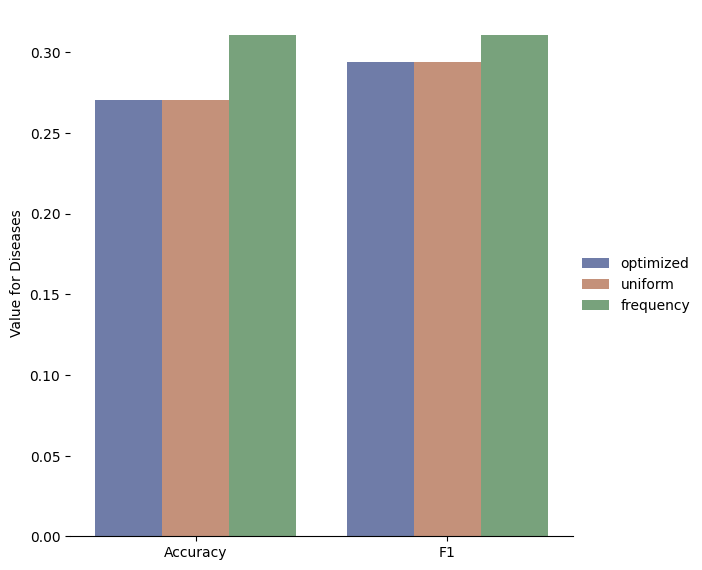

In [401]:
g = sb.catplot(
    data=df[df["Levels"] == "Level 1"], kind="bar",
    x="Metric", y="Values", hue="weights",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Value for Diseases")
g.legend.set_title("")

/Users/shakiba/Desktop/thesis.tmp/code/aggregated_patient_info/aggregated_patient_info/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


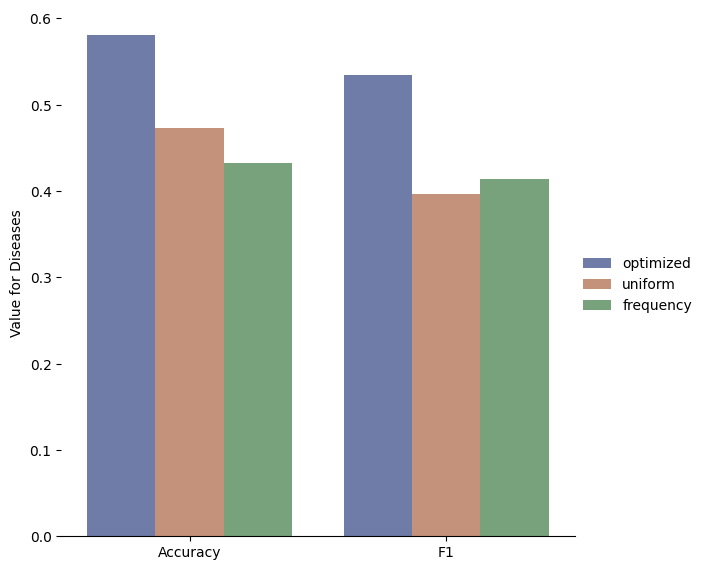

In [402]:
g = sb.catplot(
    data=df[df["Levels"] == "Level 2"], kind="bar",
    x="Metric", y="Values", hue="weights",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Value for Diseases")
g.legend.set_title("")

/Users/shakiba/Desktop/thesis.tmp/code/aggregated_patient_info/aggregated_patient_info/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


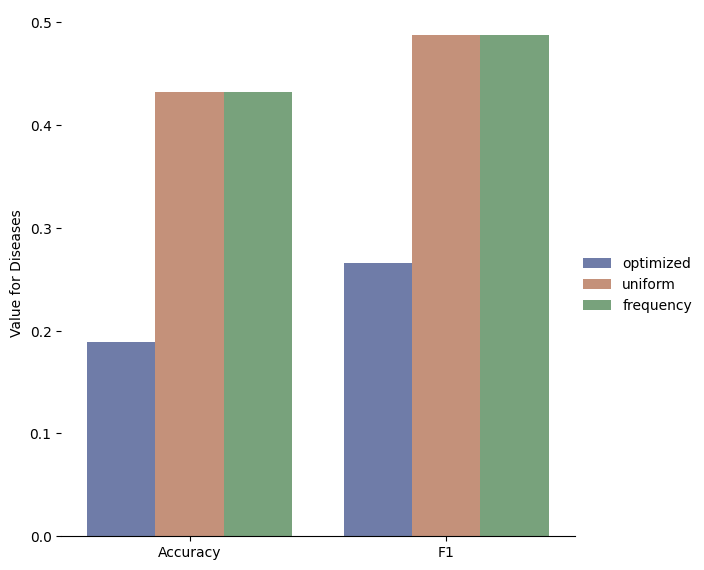

In [403]:
g = sb.catplot(
    data=df[df["Levels"] == "Level 3"], kind="bar",
    x="Metric", y="Values", hue="weights",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Value for Diseases")
g.legend.set_title("")

# Analysis of KNN vs MoGCN
compares graph densities

In [404]:
graph = ig.Graph.Adjacency((level1_freq_wa_fused > 0).tolist(), mode = "undirected")
graph.vs["name"] =  level1_graphs["G20"].obs_names
graph.vs["d"] = level1_graphs["G20"].obs.Disease
graph.vs["dg"] = level1_graphs["G20"].obs.DiseaseGroup
graph.es['weight'] = level1_freq_wa_fused[level1_freq_wa_fused.nonzero()]
graph = graph.as_undirected()
    
print(graph.density())

0.9885227693446872


In [405]:
graph = ig.Graph.Adjacency((level2_freq_wa_fused > 0).tolist(), mode = "undirected")
graph.vs["name"] =  level1_graphs["G20"].obs_names
graph.vs["d"] = level1_graphs["G20"].obs.Disease
graph.vs["dg"] = level1_graphs["G20"].obs.DiseaseGroup
graph.es['weight'] = level2_freq_wa_fused[level2_freq_wa_fused.nonzero()]
graph = graph.as_undirected()
    
print(graph.density())

0.8867086264346538


In [406]:
graph = ig.Graph.Adjacency((level3_freq_wa_fused > 0).tolist(), mode = "undirected")
graph.vs["name"] =  level1_graphs["G20"].obs_names
graph.vs["d"] = level1_graphs["G20"].obs.Disease
graph.vs["dg"] = level1_graphs["G20"].obs.DiseaseGroup
graph.es['weight'] = level3_freq_wa_fused[level3_freq_wa_fused.nonzero()]
graph = graph.as_undirected()
    
print(graph.density())

0.4172528693076638


In [407]:
g = level3_snf_fused
g[g<0.005] = 0

# adjacency matrix after filtering
exist = (g != 0) * 1.0
    
factor = np.ones(g.shape[1])
res = np.dot(exist, factor)     #degree of each node
diag_matrix = np.diag(res)  #degree matrix
   
#calculate the laplace matrix
d_inv = np.linalg.inv(diag_matrix)
g_input_to_GCN = d_inv.dot(exist)

In [408]:
graph = ig.Graph.Adjacency((g_input_to_GCN > 0).tolist(), mode = "undirected")
graph.vs["name"] =  level1_graphs["G20"].obs_names
graph.vs["d"] = level1_graphs["G20"].obs.Disease
graph.vs["dg"] = level1_graphs["G20"].obs.DiseaseGroup
graph.es['weight'] = g_input_to_GCN[g_input_to_GCN.nonzero()]
graph = graph.as_undirected()
print(graph.density())

0.349870418363569


# Selecting the best Fusion + PSN Generation + Clustering tripple

This part checks if KNN-based psns + WA + Leiden clustering and kernel-based PSNs, SNF + Spectral clustering are the best combination of PSN generation approach, modality integration approach and clustering approach. For instance the combination wa + kernel + sc which applies spectral clustering and kernel-based PSNs in combination with weighted average should have a lower accuracy than the "optimal" combinations.

In [409]:
#snf + kernel + sc

fused = compute.snf(list(level1_kernel_PSNs.values()), K=7, t = 40) 
first, second = compute.get_n_clusters(fused)
ca = cluster.spectral_clustering(fused, n_clusters=first, n_init = 40)
cl = assign_labels_to_clusters(ca)
_,_, acc, _ = predictions_and_quality(ca, cl)
print(acc)

0.3918918918918919


In [410]:
#snf + kernel + leiden
fused = compute.snf(list(level1_kernel_PSNs.values()), K=7, t = 40) 
ad_obj =ad.AnnData(fused)
ad_obj.obsp["connectivities"] = fused
scp.tl.leiden(ad_obj, resolution=0.2, adjacency=fused, directed=False, use_weights=True)
ca = list(ad_obj.obs.leiden)
cl = assign_labels_to_clusters(ca)
_,_, acc, _ = predictions_and_quality(ca, cl)
print(acc) 

0.3918918918918919


In [411]:
#wa + kernel + leiden

fused = None
for id in level1_kernel_PSNs.keys():
    if fused is None:
        fused = level1_kernel_PSNs[id] * level1_frequency_weights[id]
    else:
        fused = fused + level1_kernel_PSNs[id] * level1_frequency_weights[id]

ad_obj =ad.AnnData(fused)
ad_obj.obsp["connectivities"] = fused
scp.tl.leiden(ad_obj, resolution=0.014, adjacency=fused, directed=False, use_weights=True)
ca = list(ad_obj.obs.leiden)
cl = assign_labels_to_clusters(ca)
_,_, acc, _ = predictions_and_quality(ca, cl)
print(acc) 

0.17567567567567569


In [412]:
set(cl)

{'0', '1', '2', '3', '4', '5'}

In [413]:
#wa + kernel + sc

fused = None
for id in level1_kernel_PSNs.keys():
    if fused is None:
        fused = level1_kernel_PSNs[id] * level1_frequency_weights[id]
    else:
        fused = fused + level1_kernel_PSNs[id] * level1_frequency_weights[id]


first, second = compute.get_n_clusters(fused)
ca = cluster.spectral_clustering(fused, n_clusters=first, n_init = 40)
cl = assign_labels_to_clusters(ca)
_,_, acc, _ = predictions_and_quality(ca, cl)
print(acc) 

0.24324324324324326


In [414]:
set(cl)

{'0', '1', '2', '3'}

In [415]:
#wa + knn + leiden

fused = None
for id in level1_knn_PSNs.keys():
    if fused is None:
        fused = level1_knn_PSNs[id] * level1_frequency_weights[id]
    else:
        fused = fused + level1_knn_PSNs[id] * level1_frequency_weights[id]
ad_obj =ad.AnnData(fused)
ad_obj.obsp["connectivities"] = fused
scp.tl.leiden(ad_obj, resolution=1, adjacency=fused, directed=False, use_weights=True)
ca = list(ad_obj.obs.leiden)
cl = assign_labels_to_clusters(ca)
_,_, acc, _ = predictions_and_quality(ca, cl)
print(acc) 

0.3108108108108108


In [416]:
set(cl)

{'0', '1', '2', '3'}

In [417]:
#wa + knn + sc
fused = None
for id in level1_knn_PSNs.keys():
    if fused is None:
        fused = level1_knn_PSNs[id] * level1_frequency_weights[id]
    else:
        fused = fused + level1_knn_PSNs[id] * level1_frequency_weights[id]
first, second = compute.get_n_clusters(fused)
ca = cluster.spectral_clustering(fused, n_clusters=first, n_init = 40)
cl = assign_labels_to_clusters(ca)
_,_, acc, _ = predictions_and_quality(ca, cl)
print(acc)

0.0945945945945946


In [418]:
set(cl)

{'0', '1'}

In [419]:
# snf + knn + sc
fused = compute.snf(list(level1_knn_PSNs.values()), K=7, t = 40) 
first, second = compute.get_n_clusters(fused)
ca = cluster.spectral_clustering(fused, n_clusters=first, n_init = 40)
cl = assign_labels_to_clusters(ca)
_,_, acc, _ = predictions_and_quality(ca, cl)
print(acc)

0.16216216216216217


In [420]:
set(cl)

{'0', '1'}

In [421]:
# snf + knn + leiden
fused = compute.snf(list(level1_knn_PSNs.values()), K=7, t = 40) 
ad_obj =ad.AnnData(fused)
ad_obj.obsp["connectivities"] = fused
scp.tl.leiden(ad_obj, resolution=0.66, adjacency=fused, directed=False, use_weights=True)
ca = list(ad_obj.obs.leiden)
cl = assign_labels_to_clusters(ca)
_,_, acc, _ = predictions_and_quality(ca, cl)
print(acc) 

0.2702702702702703


In [422]:
set(cl)

{'0', '1', '2', '3'}

# Saving Data

In [423]:
with open(os.path.join(level1, 'fusions.pickle'), 'wb') as f:
    pickle.dump(level1_fusions, f)
with open(os.path.join(level2, 'fusions.pickle'), 'wb') as f:
    pickle.dump(level2_fusions, f)
with open(os.path.join(level3, 'fusions.pickle'), 'wb') as f:
    pickle.dump(level3_fusions, f)


with open(os.path.join(level1, 'cluster_info.pickle'), 'wb') as f:
    pickle.dump(level1_clustering_info, f)
with open(os.path.join(level2, 'cluster_info.pickle'), 'wb') as f:
    pickle.dump(level2_clustering_info, f)
with open(os.path.join(level3, 'cluster_info.pickle'), 'wb') as f:
    pickle.dump(level3_clustering_info, f)


with open(os.path.join(level1, 'predictions.pickle'), 'wb') as f:
    pickle.dump(level1_predicted_labels, f)
with open(os.path.join(level2, 'predictions.pickle'), 'wb') as f:
    pickle.dump(level2_predicted_labels, f)
with open(os.path.join(level3, 'predictions.pickle'), 'wb') as f:
    pickle.dump(level3_predicted_labels, f)



# PR score and Sillohuette 

In [424]:
print("SNF: ", round(skl.metrics.silhouette_score(level1_fusions["snf_kernel"], level1_clustering_info["fused_kernels"]),4),round( skl.metrics.silhouette_score(level2_fusions["snf_kernel"], level2_clustering_info["fused_kernels"]),4),round( skl.metrics.silhouette_score(level3_fusions["snf_kernel"], level3_clustering_info["fused_kernels"]),4) )

SNF:  -0.0203 -0.0265 -0.0183


In [425]:
print(round(compute_pr_score(level1_fusions["snf_kernel"]),4)  , round(compute_pr_score(level2_fusions["snf_kernel"]),4)  , round(compute_pr_score(level3_fusions["snf_kernel"]),4)  )

0.0613 0.0866 0.1419


In [426]:
data_analysis_level1["SNF"]["PR"] = round(compute_pr_score(level1_fusions["snf_kernel"]),4)
data_analysis_level2["SNF"]["PR"] = round(compute_pr_score(level2_fusions["snf_kernel"]),4)
data_analysis_level2["SNF"]["PR"] = round(compute_pr_score(level2_fusions["snf_kernel"]),4)

In [427]:
print("MoGCN: ", round(skl.metrics.silhouette_score(g1, l1),4), round(skl.metrics.silhouette_score(g2, l2),4), round(skl.metrics.silhouette_score(g3, l3),4))

MoGCN:  0.1344 0.1008 0.4807


In [428]:
print(round(compute_pr_score(g1),4)  , round(compute_pr_score(g2),4)  , round(compute_pr_score(g3),4)  )

0.3078 0.2997 0.2885


In [429]:
data_analysis_level1["Sparse-SNF"]["PR"] = round(compute_pr_score(g1),4)
data_analysis_level2["Sparse-SNF"]["PR"] = round(compute_pr_score(g2),4)
data_analysis_level2["Sparse-SNF"]["PR"] = round(compute_pr_score(g3),4)

In [432]:
print("WA: ", round(skl.metrics.silhouette_score(level1_fusions["wa_knn_frequency"],level1_clustering_info["fused_knn_frequency"]),4), round(skl.metrics.silhouette_score(level2_fusions["wa_knn_frequency"], level2_clustering_info["fused_knn_frequency"]),4), round(skl.metrics.silhouette_score(level3_fusions["wa_knn_frequency"], level3_clustering_info["fused_knn_frequency"]),4) )

WA:  0.0732 0.0754 0.0888


In [433]:
print(round(compute_pr_score(level1_fusions["wa_knn_frequency"]),4)  , round(compute_pr_score(level2_fusions["wa_knn_frequency"]),4)  , round(compute_pr_score(level3_fusions["wa_knn_frequency"]),4)  )

0.2573 0.2775 0.3239


In [434]:
data_analysis_level1["WA"]["PR"] = round(compute_pr_score(level1_fusions["wa_knn_frequency"]),4)
data_analysis_level2["WA"]["PR"] = round(compute_pr_score(level2_fusions["wa_knn_frequency"]),4)
data_analysis_level2["WA"]["PR"] = round(compute_pr_score(level3_fusions["wa_knn_frequency"]),4)

# Visualization of Predictions

## After fusion

In [435]:
dg_dataframe = pd.DataFrame(list(level1_graphs["G0"].obs.DiseaseGroup.to_dict().values()), index = list(level1_graphs["G0"].obs.DiseaseGroup.to_dict().keys()),  columns = ["DiseaseGroup"])
d_dataframe = pd.DataFrame(list(level1_graphs["G0"].obs.Disease.to_dict().values()), index = list(level1_graphs["G0"].obs.Disease.to_dict().keys()),  columns = ["Disease"])

outcome = pd.DataFrame(list(level1_graphs["G0"].obs.Outcome), columns = ["Outcome"], index = d_dataframe.index)
symptomatic = pd.DataFrame(list(level1_graphs["G0"].obs.Symptomatic), columns = ["Sym"], index = d_dataframe.index)
smoke = pd.DataFrame(list(level1_graphs["G0"].obs.Smoking), columns = ["Smoke"], index = d_dataframe.index)
age = pd.DataFrame(list(level1_graphs["G0"].obs.Age), columns = ["Age"], index = d_dataframe.index)
sex = pd.DataFrame(list(level1_graphs["G0"].obs.Sex), columns = ["Sex"], index = d_dataframe.index)

In [436]:
def create_embed_clusters(embedding):
    x = ad.AnnData(embedding)
    scp.pp.neighbors(x, n_neighbors = 7, use_rep='X', metric =  "correlation") 
    scp.tl.leiden(x, resolution=1, directed=False, use_weights=True)
    l = pd.DataFrame(list(x.obs.leiden), columns = ["Label"], index = d_dataframe.index)
    return l

def create_clusters_labels(clusters):
    l = pd.DataFrame(list(clusters), columns = ["Label"], index = d_dataframe.index)
    return l

### WA

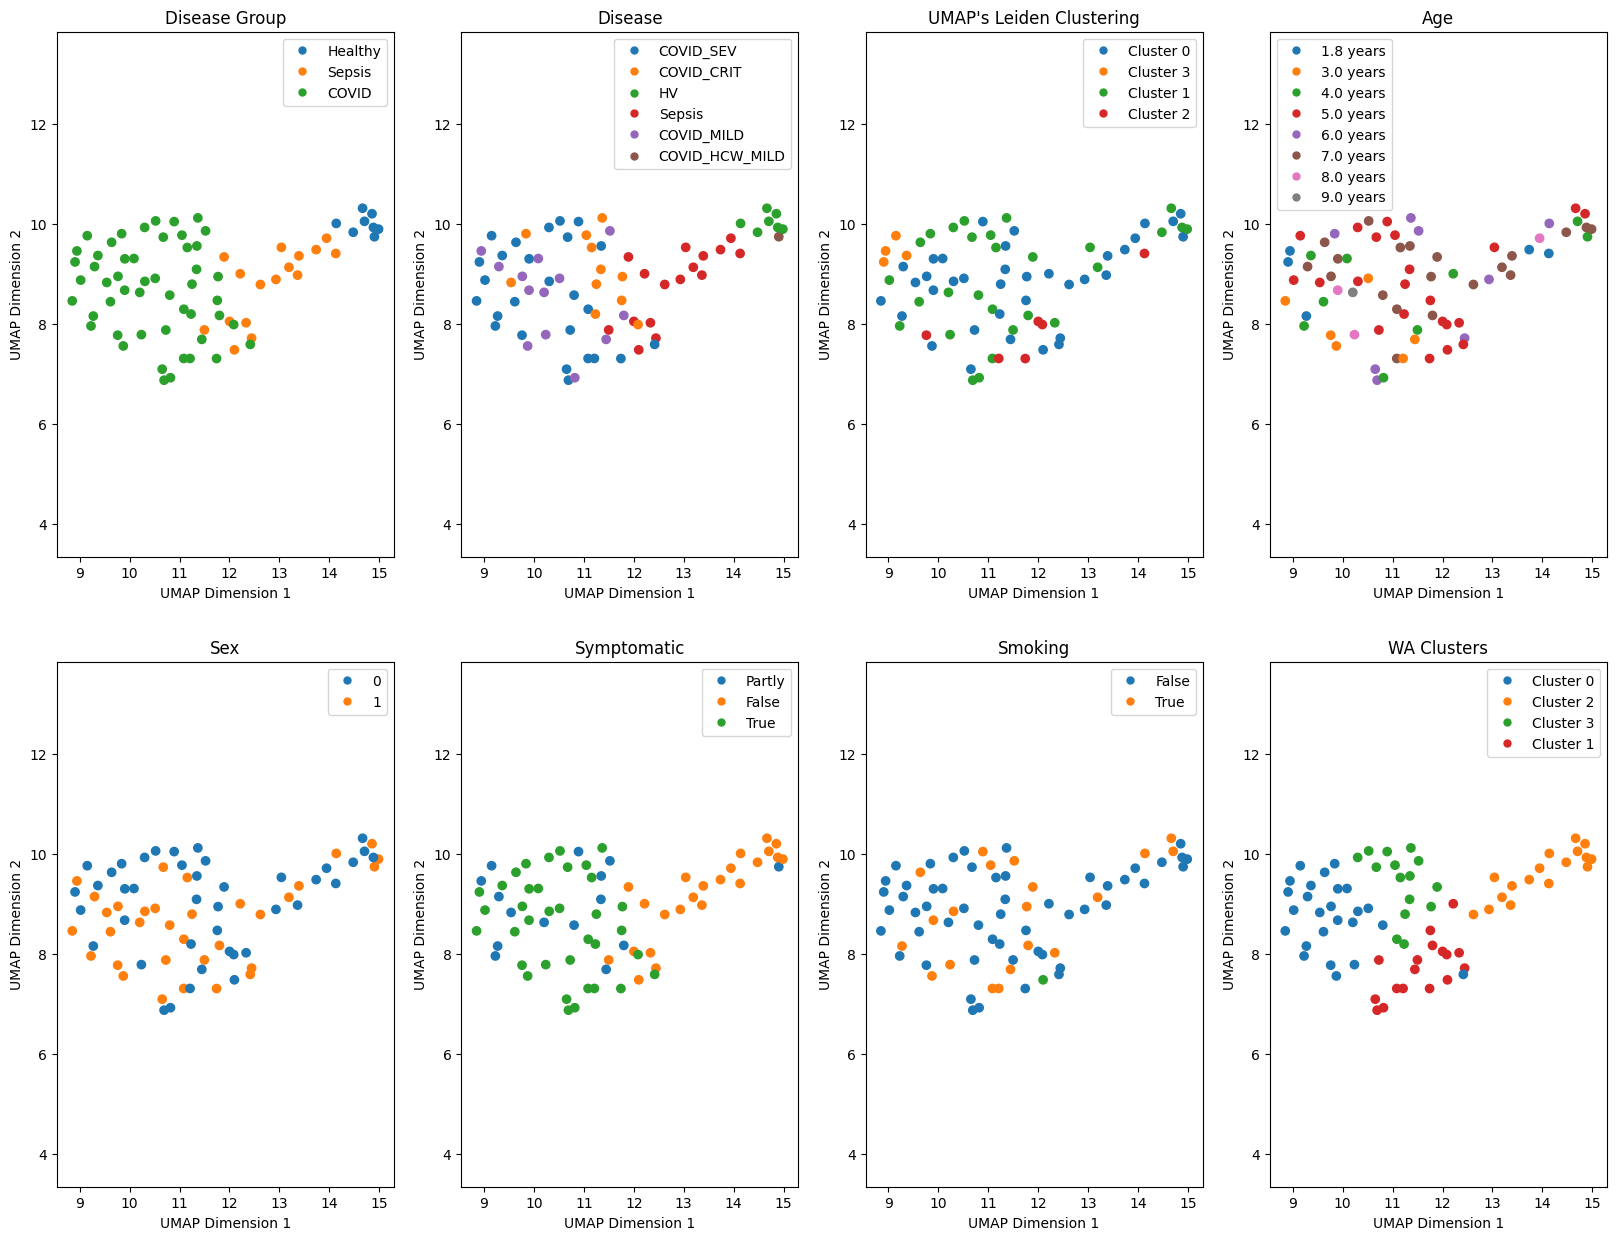

In [437]:
df = pd.DataFrame(level1_fusions["wa_knn_frequency"])
reducer = umap.UMAP()
embedding1 = reducer.fit_transform(df)

plt.subplots(2,4, figsize=(20, 15))

plt.subplot(2,4,1)
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in dg_dataframe.DiseaseGroup.map({"Healthy":0, "Sepsis":1, "COVID":2})])

colors = [sb.color_palette()[0], sb.color_palette()[1], sb.color_palette()[2]]
texts = ["Healthy", "Sepsis", "COVID"]
patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)
plt.gca().set_aspect('equal', 'datalim')
plt.title("Disease Group")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")


plt.subplot(2,4,2)
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in d_dataframe.Disease.map({j: i for i,j in enumerate(set(d_dataframe.Disease))})])

colors = [sb.color_palette()[i] for i in range(len(set(d_dataframe.Disease)))]
texts = [i for i in set(d_dataframe.Disease)]
patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("Disease")


l = create_embed_clusters(embedding1)
plt.subplot(2,4,3)
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in l.Label.map({j: i for i,j in enumerate(set(l.Label))})])

colors = [sb.color_palette()[i] for i in range(len(set(l.Label)))]
texts = ["Cluster "+ str(i) for i in set(l.Label)]
patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("UMAP's Leiden Clustering")


l = create_clusters_labels(level1_clustering_info["fused_knn_frequency"])

plt.subplot(2,4,8)
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in l.Label.map({j: i for i,j in enumerate(set(l.Label))})])

colors = [sb.color_palette()[i] for i in range(len(set(l.Label)))]
texts = ["Cluster "+ str(i) for i in set(l.Label)]
patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("WA Clusters")

plt.savefig(os.path.join(write_path, "wa_fused1"))


plt.subplot(2,4,6)
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in symptomatic.Sym.map({j: i for i,j in enumerate(set(symptomatic.Sym))})])

colors = [sb.color_palette()[i] for i in range(len(set(symptomatic.Sym)))]
texts = [] 
for i in set(symptomatic.Sym):
    if i == 0:
        texts.append("False")
    if i == 0.5:
        texts.append("Partly")
    if i == 1:
        texts.append("True")
patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("Symptomatic")




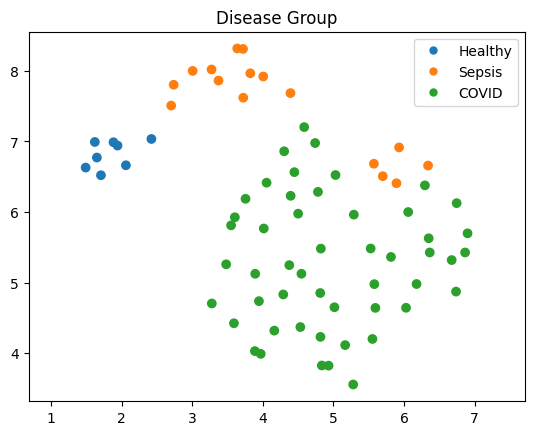

In [438]:
df = pd.DataFrame(level2_fusions["wa_knn_frequency"])
reducer = umap.UMAP()
embedding1 = reducer.fit_transform(df)

#fig, ax = plt.subplots(1,2, figsize=(20,20))
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in dg_dataframe.DiseaseGroup.map({"Healthy":0, "Sepsis":1, "COVID":2})])

colors = [sb.color_palette()[0], sb.color_palette()[1], sb.color_palette()[2]]
texts = ["Healthy", "Sepsis", "COVID"]
patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)


plt.gca().set_aspect('equal', 'datalim')
plt.title("Disease Group")
plt.savefig(os.path.join(write_path, "wa_fused2"))

### SNF

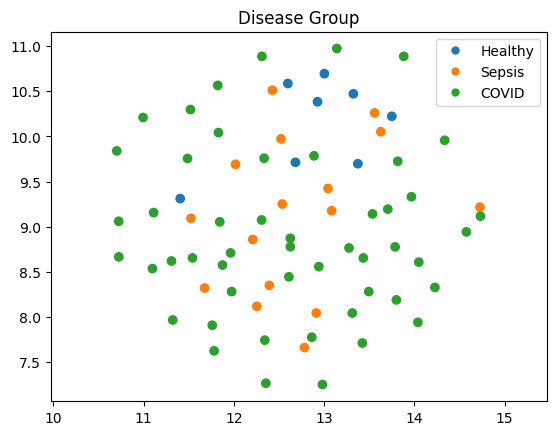

In [443]:
df = pd.DataFrame(level1_fusions["snf_kernel"])
reducer = umap.UMAP()
embedding1 = reducer.fit_transform(df)

#fig, ax = plt.subplots(1,2, figsize=(20,20))
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in dg_dataframe.DiseaseGroup.map({"Healthy":0, "Sepsis":1, "COVID":2})])

colors = [sb.color_palette()[0], sb.color_palette()[1], sb.color_palette()[2]]
texts = ["Healthy", "Sepsis", "COVID"]
patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)

plt.gca().set_aspect('equal', 'datalim')
plt.title("Disease Group")
plt.savefig(os.path.join(write_path, "snf_fused1"))

/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_30404/266862140.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,4,1)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_30404/266862140.py:44: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,4,3)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_30404/266862140.py:81: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,4,5)
/var/folders/d6/19fjtfkn2rb94y09ln9bk6m00000gn/T/ipykernel_30404/266862140.py:126: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and wi

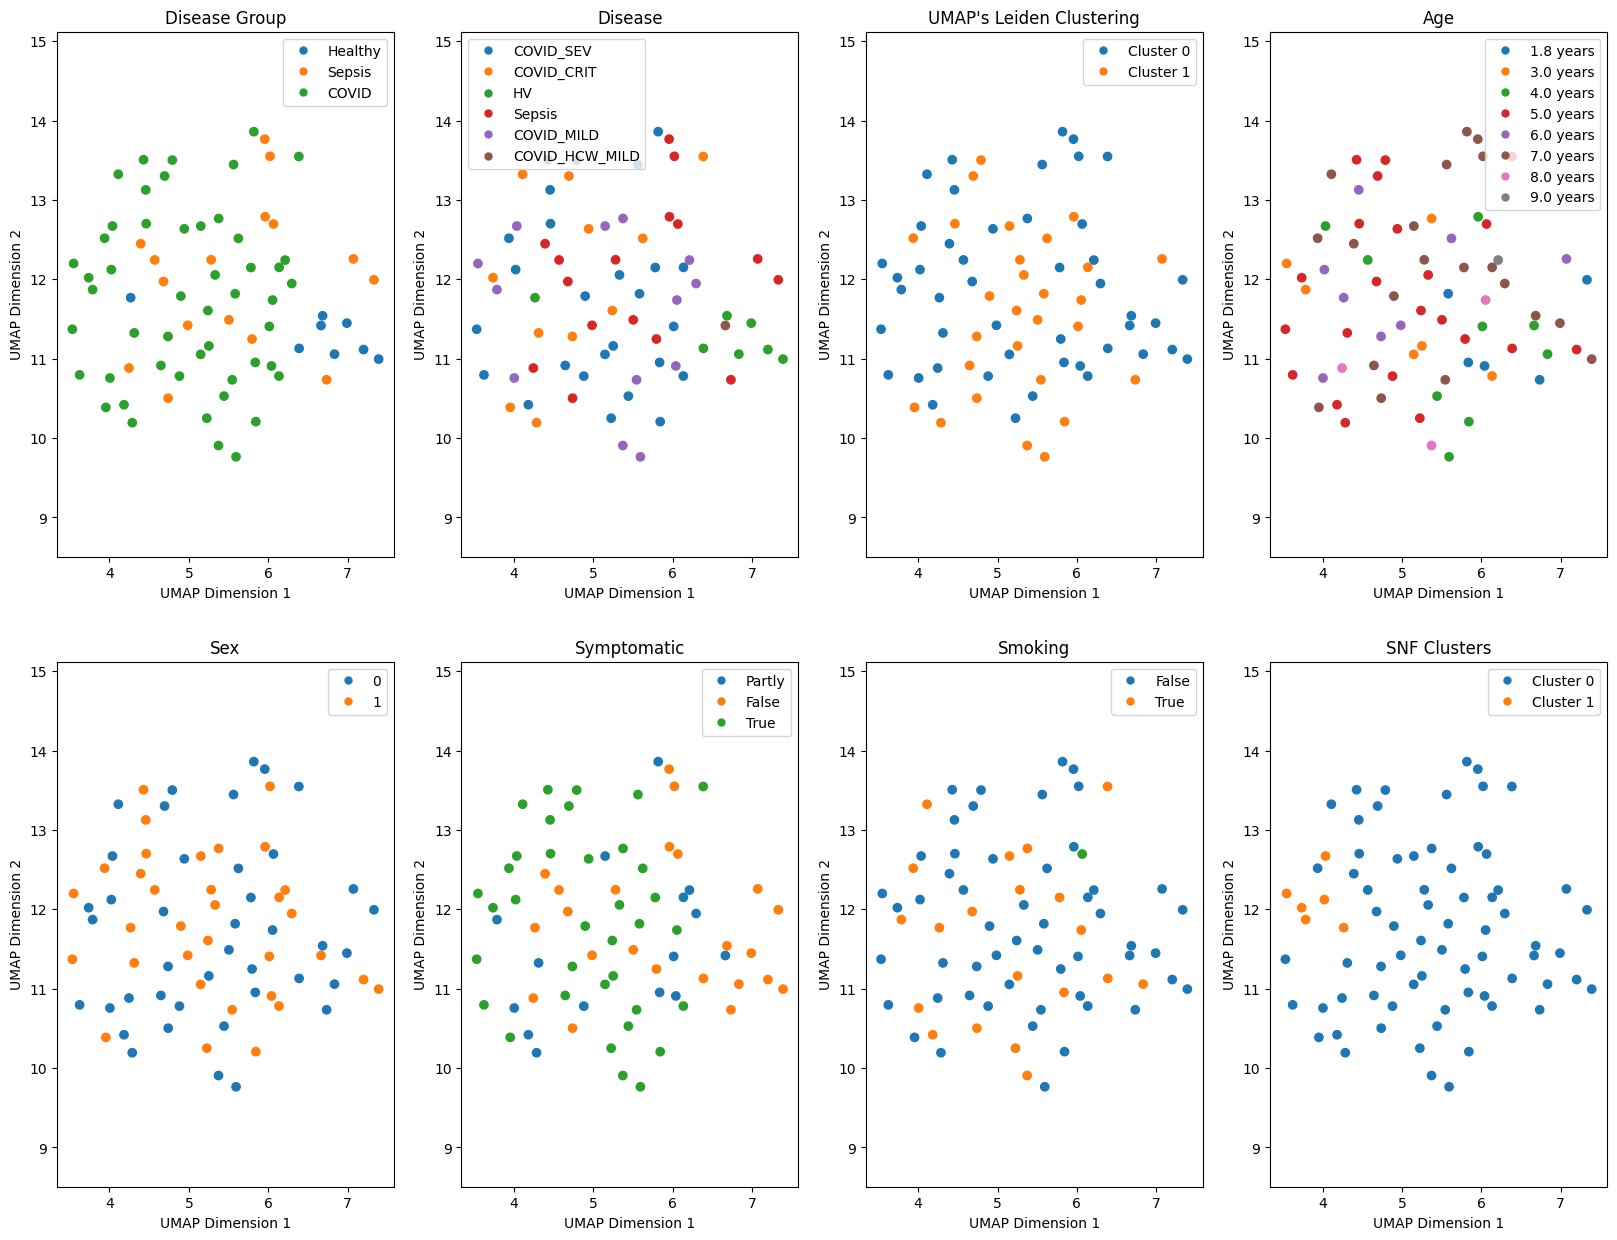

In [444]:
df = pd.DataFrame(level2_fusions["snf_kernel"])
reducer = umap.UMAP()
embedding1 = reducer.fit_transform(df)

plt.subplots(4,2, figsize=(20,15))

plt.subplot(2,4,1)
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in dg_dataframe.DiseaseGroup.map({"Healthy":0, "Sepsis":1, "COVID":2})])

colors = [sb.color_palette()[0], sb.color_palette()[1], sb.color_palette()[2]]
texts = ["Healthy", "Sepsis", "COVID"]
patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)
plt.gca().set_aspect('equal', 'datalim')
plt.title("Disease Group")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")


plt.subplot(2,4,2)
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in d_dataframe.Disease.map({j: i for i,j in enumerate(set(d_dataframe.Disease))})])

colors = [sb.color_palette()[i] for i in range(len(set(d_dataframe.Disease)))]
texts = [i for i in set(d_dataframe.Disease)]
patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("Disease")


l = create_embed_clusters(embedding1)
plt.subplot(2,4,3)
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in l.Label.map({j: i for i,j in enumerate(set(l.Label))})])

colors = [sb.color_palette()[i] for i in range(len(set(l.Label)))]
texts = ["Cluster "+ str(i) for i in set(l.Label)]
patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("UMAP's Leiden Clustering")


plt.subplot(2,4,4)
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in age.Age.map({j: i for i,j in enumerate(set(age.Age))})])

colors = [sb.color_palette()[i] for i in range(len(set(age.Age)))]
texts = [str(i) + " years" for i in set(age.Age)]
patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("Age")



plt.subplot(2,4,5)
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in sex.Sex.map({j: i for i,j in enumerate(set(sex.Sex))})])

colors = [sb.color_palette()[i] for i in range(len(set(sex.Sex)))]
texts = [str(i) for i in set(sex.Sex)]
patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("Sex")



plt.subplot(2,4,6)
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in symptomatic.Sym.map({j: i for i,j in enumerate(set(symptomatic.Sym))})])

colors = [sb.color_palette()[i] for i in range(len(set(symptomatic.Sym)))]
texts = [] 
for i in set(symptomatic.Sym):
    if i == 0:
        texts.append("False")
    if i == 0.5:
        texts.append("Partly")
    if i == 1:
        texts.append("True")
patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("Symptomatic")



plt.subplot(2,4,7)
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in smoke.Smoke.map({j: i for i,j in enumerate(set(smoke.Smoke))})])

colors = [sb.color_palette()[i] for i in range(len(set(smoke.Smoke)))]
texts = [] 
for i in set(smoke.Smoke):
    if i == 0:
        texts.append("False")
    if i == 1:
        texts.append("True")
patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("Smoking")

l = create_clusters_labels(level2_clustering_info["fused_kernels"])

plt.subplot(2,4,8)
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in l.Label.map({j: i for i,j in enumerate(set(l.Label))})])

colors = [sb.color_palette()[i] for i in range(len(set(l.Label)))]
texts = ["Cluster "+ str(i) for i in set(l.Label)]
patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("SNF Clusters")

plt.savefig(os.path.join(write_path, "snf_fused2"))

### Saprse-SNF

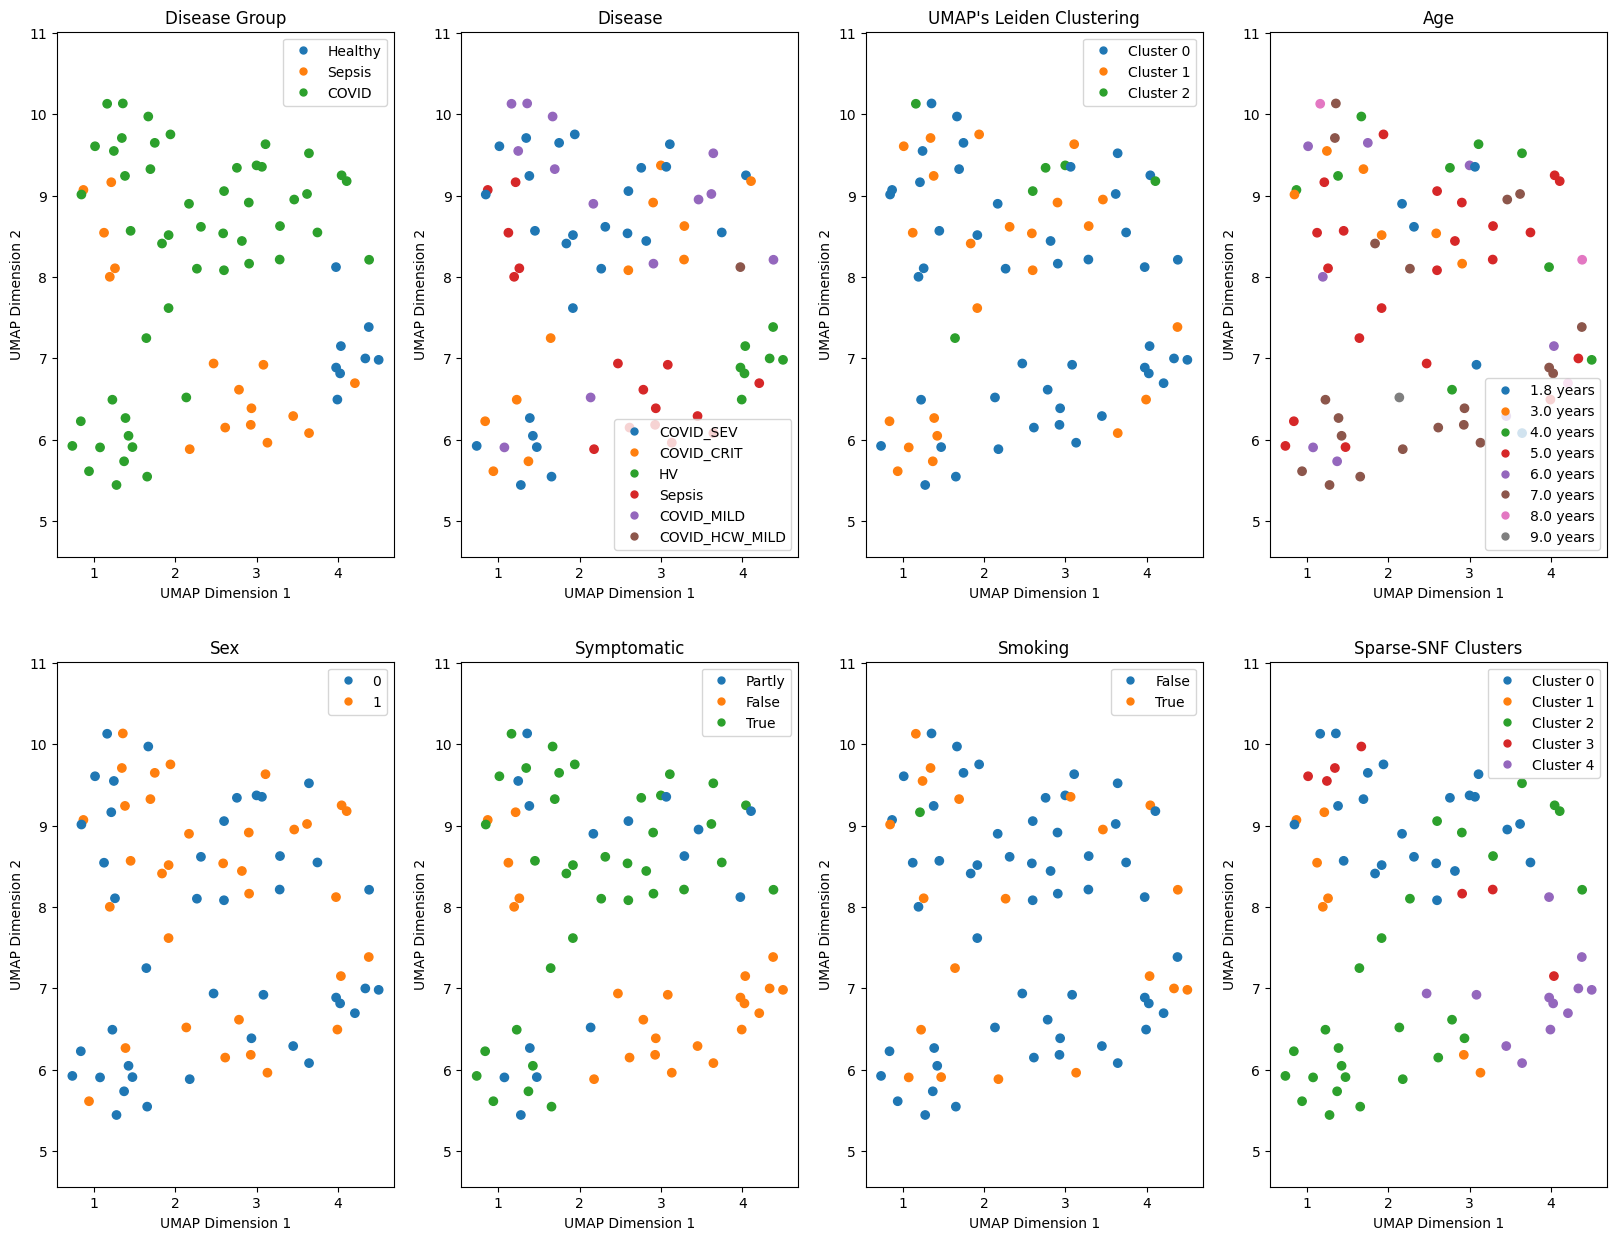

In [449]:
dg_dataframe = pd.DataFrame(list(level1_graphs["G0"].obs.DiseaseGroup.to_dict().values()), index = list(level1_graphs["G0"].obs.DiseaseGroup.to_dict().keys()),  columns = ["DiseaseGroup"])
df = pd.DataFrame(g1)
reducer = umap.UMAP()
embedding1 = reducer.fit_transform(df)

plt.subplots(2,4, figsize=(20,15))

plt.subplot(2,4,1)
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in dg_dataframe.DiseaseGroup.map({"Healthy":0, "Sepsis":1, "COVID":2})])

colors = [sb.color_palette()[0], sb.color_palette()[1], sb.color_palette()[2]]
texts = ["Healthy", "Sepsis", "COVID"]
patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)
plt.gca().set_aspect('equal', 'datalim')
plt.title("Disease Group")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")


plt.subplot(2,4,2)
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in d_dataframe.Disease.map({j: i for i,j in enumerate(set(d_dataframe.Disease))})])

colors = [sb.color_palette()[i] for i in range(len(set(d_dataframe.Disease)))]
texts = [i for i in set(d_dataframe.Disease)]
patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("Disease")


l = create_embed_clusters(embedding1)
plt.subplot(2,4,3)
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in l.Label.map({j: i for i,j in enumerate(set(l.Label))})])

colors = [sb.color_palette()[i] for i in range(len(set(l.Label)))]
texts = ["Cluster "+ str(i) for i in set(l.Label)]
patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("UMAP's Leiden Clustering")


plt.subplot(2,4,4)
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in age.Age.map({j: i for i,j in enumerate(set(age.Age))})])

colors = [sb.color_palette()[i] for i in range(len(set(age.Age)))]
texts = [str(i) + " years" for i in set(age.Age)]
patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("Age")



plt.subplot(2,4,5)
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in sex.Sex.map({j: i for i,j in enumerate(set(sex.Sex))})])

colors = [sb.color_palette()[i] for i in range(len(set(sex.Sex)))]
texts = [str(i) for i in set(sex.Sex)]
patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("Sex")



plt.subplot(2,4,6)
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in symptomatic.Sym.map({j: i for i,j in enumerate(set(symptomatic.Sym))})])

colors = [sb.color_palette()[i] for i in range(len(set(symptomatic.Sym)))]
texts = [] 
for i in set(symptomatic.Sym):
    if i == 0:
        texts.append("False")
    if i == 0.5:
        texts.append("Partly")
    if i == 1:
        texts.append("True")
patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("Symptomatic")



plt.subplot(2,4,7)
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in smoke.Smoke.map({j: i for i,j in enumerate(set(smoke.Smoke))})])

colors = [sb.color_palette()[i] for i in range(len(set(smoke.Smoke)))]
texts = [] 
for i in set(smoke.Smoke):
    if i == 0:
        texts.append("False")
    if i == 1:
        texts.append("True")
patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("Smoking")


l = create_clusters_labels(l2)

plt.subplot(2,4,8)
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in l.Label.map({j: i for i,j in enumerate(set(l.Label))})])

colors = [sb.color_palette()[i] for i in range(len(set(l.Label)))]
texts = ["Cluster "+ str(i) for i in set(l.Label)]
patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)
plt.gca().set_aspect('equal', 'datalim')
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.title("Sparse-SNF Clusters")

plt.savefig(os.path.join(write_path, "sparse_snf_fused1"))

Text(0.5, 1.0, 'Disease Group')

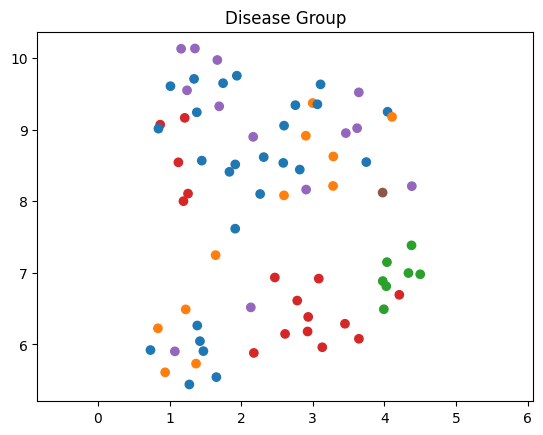

In [450]:
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in d_dataframe.Disease.map({j: i for i,j in enumerate(set(d_dataframe.Disease))})])
plt.gca().set_aspect('equal', 'datalim')
plt.title("Disease Group")

## Before fsuion

### L1

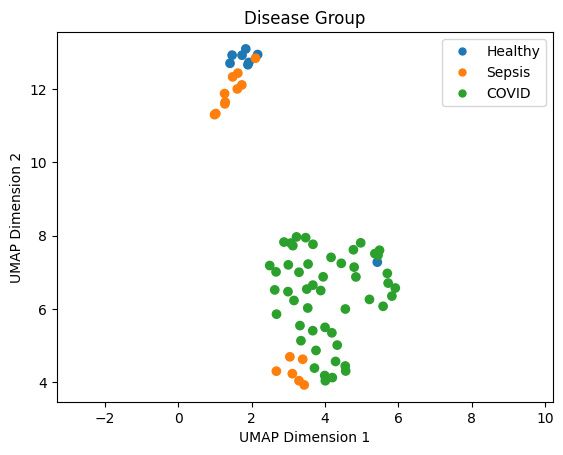

In [456]:
dg_dataframe = pd.DataFrame(list(level1_graphs["G0"].obs.DiseaseGroup.to_dict().values()), index = list(level1_graphs["G0"].obs.DiseaseGroup.to_dict().keys()),  columns = ["DiseaseGroup"])
df = pd.DataFrame(l1_unimodal_kernel_binary_preds_dg)
reducer = umap.UMAP()
embedding1 = reducer.fit_transform(df)

#fig, ax = plt.subplots(1,2, figsize=(20,20))
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in dg_dataframe.DiseaseGroup.map({"Healthy":0, "Sepsis":1, "COVID":2})])

colors = [sb.color_palette()[0], sb.color_palette()[1], sb.color_palette()[2]]
texts = ["Healthy", "Sepsis", "COVID"]
patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)

plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")

plt.gca().set_aspect('equal', 'datalim')
plt.title("Disease Group")
plt.savefig(os.path.join(write_path, "snf1"))

### L2

In [458]:
data = pd.DataFrame(l2_unimodal_kernel_binary_preds_d | {"SNF-L2" : binary_predictions_d["SNF-L2"]}, index = patients_74).T

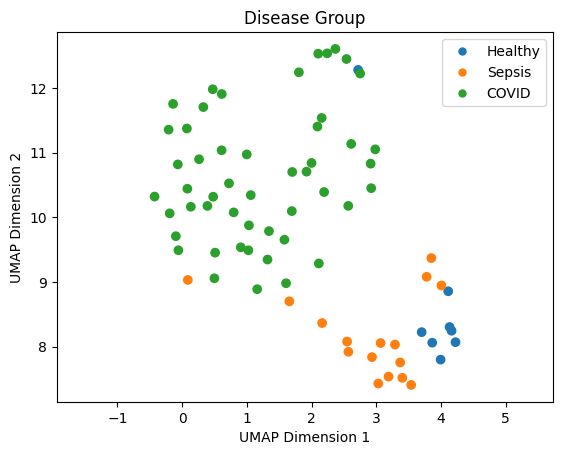

In [459]:
dg_dataframe = pd.DataFrame(list(level1_graphs["G0"].obs.DiseaseGroup.to_dict().values()), index = list(level1_graphs["G0"].obs.DiseaseGroup.to_dict().keys()),  columns = ["DiseaseGroup"])
df = pd.DataFrame(l2_unimodal_kernel_binary_preds_dg)
reducer = umap.UMAP()
embedding1 = reducer.fit_transform(df)

#fig, ax = plt.subplots(1,2, figsize=(20,20))
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in dg_dataframe.DiseaseGroup.map({"Healthy":0, "Sepsis":1, "COVID":2})])
colors = [sb.color_palette()[0], sb.color_palette()[1], sb.color_palette()[2]]
texts = ["Healthy", "Sepsis", "COVID"]
patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)

plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")

plt.gca().set_aspect('equal', 'datalim')
plt.title("Disease Group")
plt.savefig(os.path.join(write_path, "snf2"))

### L3

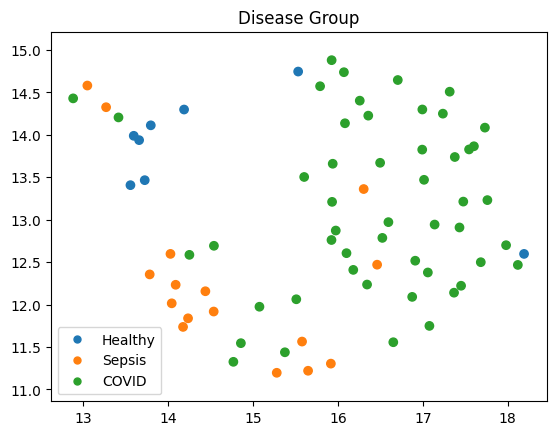

In [461]:
dg_dataframe = pd.DataFrame(list(level1_graphs["G0"].obs.DiseaseGroup.to_dict().values()), index = list(level1_graphs["G0"].obs.DiseaseGroup.to_dict().keys()),  columns = ["DiseaseGroup"])
df = pd.DataFrame(l3_unimodal_kernel_binary_preds_dg)
reducer = umap.UMAP()
embedding1 = reducer.fit_transform(df)

#fig, ax = plt.subplots(1,2, figsize=(20,20))
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in dg_dataframe.DiseaseGroup.map({"Healthy":0, "Sepsis":1, "COVID":2})])

colors = [sb.color_palette()[0], sb.color_palette()[1], sb.color_palette()[2]]
texts = ["Healthy", "Sepsis", "COVID"]
patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)


plt.gca().set_aspect('equal', 'datalim')
plt.title("Disease Group")
plt.savefig(os.path.join(write_path, "snf3"))

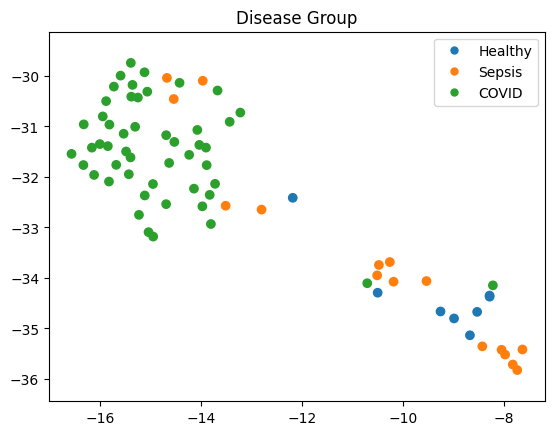

In [463]:
dg_dataframe = pd.DataFrame(list(level1_graphs["G0"].obs.DiseaseGroup.to_dict().values()), index = list(level1_graphs["G0"].obs.DiseaseGroup.to_dict().keys()),  columns = ["DiseaseGroup"])
df = pd.DataFrame(l3_unimodal_knn_binary_preds_dg)
reducer = umap.UMAP()
embedding1 = reducer.fit_transform(df)

#fig, ax = plt.subplots(1,2, figsize=(20,20))
plt.scatter(
    embedding1[:, 0],
    embedding1[:, 1],
    c=[sb.color_palette()[x] for x in dg_dataframe.DiseaseGroup.map({"Healthy":0, "Sepsis":1, "COVID":2})])

colors = [sb.color_palette()[0], sb.color_palette()[1], sb.color_palette()[2]]
texts = ["Healthy", "Sepsis", "COVID"]
patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches)

plt.gca().set_aspect('equal', 'datalim')
plt.title("Disease Group")
plt.savefig(os.path.join(write_path, "wa3"))

<Axes: >

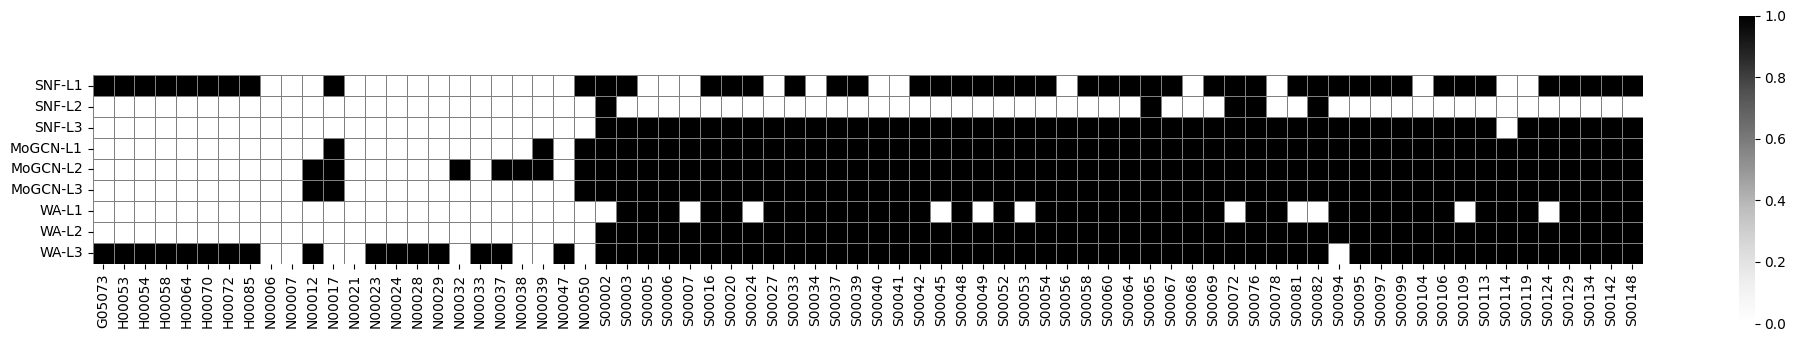

In [465]:
fig, ax = plt.subplots(figsize=(25,5))
sb.heatmap(pd.DataFrame(binary_predictions_dg, index = patients_74).T, cmap="Greys", ax = ax, square=True, robust = False, linewidth=.5, linecolor = "grey", cbar_kws={"shrink": 0.8}, cbar = True)

In [466]:
round(pd.DataFrame(binary_predictions_dg | {"disease": list(level1_graphs["G0"].obs.DiseaseGroup)}, index = patients_74).groupby("disease").mean() * 100, 2).to_csv(os.path.join(write_path,"disease_groups_broken_down.csv"))

In [467]:
round(pd.DataFrame(binary_predictions_d | {"disease": list(level1_graphs["G0"].obs.Disease)}, index = patients_74).groupby("disease").mean() * 100, 2).to_csv(os.path.join(write_path,"diseases_broken_down.csv"))

<Axes: >

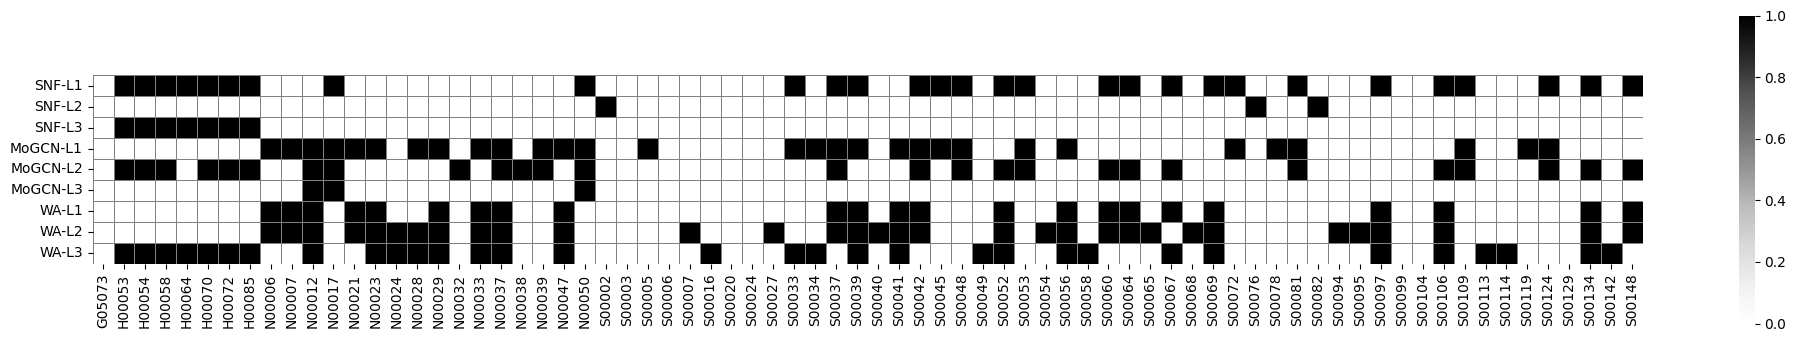

In [468]:
fig, ax = plt.subplots(figsize=(25,5))
sb.heatmap(pd.DataFrame(binary_predictions_d, index = patients_74).T, cmap="Greys", ax = ax, square=True, robust = False, linewidth=.5, linecolor = "grey", cbar_kws={"shrink": 0.8}, cbar = True)

# Saving Data

In [469]:
# uncomment to overwrite this file, or if it is the first time running this code.

"""with open(os.path.join(write_path, "analysis_level3.pickle"), "wb") as f:
    pickle.dump(data_analysis_level3, f)

with open(os.path.join(write_path, "analysis_level2.pickle"), "wb") as f:
    pickle.dump(data_analysis_level2, f)

with open(os.path.join(write_path, "analysis_level1.pickle"), "wb") as f:
    pickle.dump(data_analysis_level1, f)"""

'with open(os.path.join(write_path, "analysis_level3.pickle"), "wb") as f:\n    pickle.dump(data_analysis_level3, f)\n\nwith open(os.path.join(write_path, "analysis_level2.pickle"), "wb") as f:\n    pickle.dump(data_analysis_level2, f)\n\nwith open(os.path.join(write_path, "analysis_level1.pickle"), "wb") as f:\n    pickle.dump(data_analysis_level1, f)'

In [470]:
level1_fusions["sparse_SNF"] = g1
level2_fusions["sparse_SNF"] = g2
level3_fusions["sparse_SNF"] = g3

with open(os.path.join(write_path, "level1_fusions.pickle"), "wb") as f:
    pickle.dump(level1_fusions, f)

with open(os.path.join(write_path, "level2_fusions.pickle"), "wb") as f:
    pickle.dump(level2_fusions, f)

with open(os.path.join(write_path, "level3_fusions.pickle"), "wb") as f:
    pickle.dump(level3_fusions, f)

In [471]:
level1_clustering_info["sparse_SNF"] = l1
level2_clustering_info["sparse_SNF"] = l2
level3_clustering_info["sparse_SNF"] = l3

with open(os.path.join(write_path, "level1_clustering.pickle"), "wb") as f:
    pickle.dump(level1_clustering_info, f)

with open(os.path.join(write_path, "level2_clustering.pickle"), "wb") as f:
    pickle.dump(level2_clustering_info, f)

with open(os.path.join(write_path, "level3_clustering.pickle"), "wb") as f:
    pickle.dump(level3_clustering_info, f)